## Build MRCNN Model
Pass data through MRCNN and then FCN and investigte output values from FCN
- First we generate the heatmaps, and also visually cehck them. 
- the we pass the heatmaps to the routine that prodcues the scores 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
pp.pprint(sys.path)
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
from mrcnn.prep_notebook import build_mrcnn_inference_pipeline, get_inference_batch, get_image_batch, run_mrcnn_detection
from mrcnn.coco          import prep_coco_dataset

input_parms  =" --batch_size     1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco_subset "
# input_parms +=" --fcn_logs_dir   train_fcn8_subset " 
input_parms +=" --mrcnn_model    last "
input_parms +=" --sysout         screen "
input_parms +=" --coco_classes   78 79 80 81 82 44 46 47 48 49 50 51 34 35 36 37 38 39 40 41 42 43 10 11 13 14 15 "

parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())

Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
[ '',
  '/home/kbardool/anaconda3/envs/TFG/lib/python35.zip',
  '/home/kbardool/anaconda3/envs/TFG/lib/python3.5',
  '/home/kbardool/anaconda3/envs/TFG/lib/python3.5/plat-linux',
  '/home/kbardool/anaconda3/envs/TFG/lib/python3.5/lib-dynload',
  '/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages',
  '/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/IPython/extensions',
  '/home/kbardool/.ipython']
appending '..' to sys.path


Using TensorFlow backend.


## Defined training datasets

In [2]:
from mrcnn.prep_notebook import build_coco_config
mrcnn_config = build_coco_config('mrcnn', mode='inference', args = args, verbose = 1)

>>> Initialize Paths
 Linx  Linux

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN32
   fcn_layers                     ['fcn32+']
   fcn_logs_dir                   train_fcn
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_coco_subset
   mrcnn_model                    last
   new_log_folder                 False
   opt                            ADAGRAD
   scale_factor                   4
   steps_in_epoch                 1
   sysout                    

In [3]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
# del dataset
# chair/cound/dining tbl/ electronics/ appliances -train : 34562  val: 1489
# furn_elect_appl = [62, 63, 67, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]  

## appliances / kitchen / sports -- train: 46891  val: 1954
# appl_ktch_sports = [78, 79, 80, 81, 82,44, 46, 47, 48, 49, 50, 51,34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

print(args.coco_classes)
dataset    , generator      = prep_coco_dataset(["train", "val"], mrcnn_config, generator = True, return_coco = True,
                                                shuffle = False, 
                                                load_coco_classes=args.coco_classes, 
                                                loadAnns = 'all_classes')
# dataset_val, generator_val  = prep_coco_dataset(["minival"]        , mrcnn_config, generator = True , return_coco = True, load_coco_classes=args.coco_classes)

# dataset_train = prep_coco_dataset(["train",  "val35k"], mrcnn_config, generator = False , return_coco = True, load_coco_classes=args.coco_classes)
# dataset_val   = prep_coco_dataset(["minival"], mrcnn_config, generator = False , return_coco = True, load_coco_classes=args.coco_classes)


[78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
   Loading annotations for all Coco classes ...    
loading annotations into memory...
Done (t=13.33s)
creating index...
index created!
 load subset of classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
 image dir            :  /home/kbardool/MLDatasets/coco2014/train2014
 json_path_dir        :  /home/kbardool/MLDatasets/coco2014/annotations/instances_train2014.json
 number of images     :  40400
 image_ids[:10]       :  [262146, 524291, 9, 393227, 393230, 131087, 393241, 393242, 131099, 393251]
 image_ids[1000:1010] :  [396150, 265080, 396157, 2951, 396172, 134032, 134033, 527250, 2963, 2964]
   Loading annotations for all Coco classes ...    
loading annotations into memory...
Done (t=7.34s)
creating index...
index created!
 load subset of classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36,

####  Display active classes of `dataset`

In [4]:
print(len(dataset.image_info)) # , len(dataset_val.image_info))
# print(dataset.ext_to_int_id)
# pp.pprint(dataset.class_from_source_map)
print(dataset.active_class_ids)
print(dataset.active_ext_class_ids)

# for ext_cls in dataset.active_ext_class_ids:
#     int_cls = dataset.map_source_class_id( "coco.{}".format(ext_cls))
#     print('ext_cls:',ext_cls, 'int_cls: ', int_cls, 'name:', dataset.class_info[int_cls]['category'],'-',dataset.class_info[int_cls]['name'])
print(' {:6s}    {:6s}   {:20s}  '.format(' id', 'ext_id', 'class name'))
print('-'*50)
for i in dataset.active_class_info:
    print(' {:5d}    {:5d}   {:20s}  '.format(i, dataset.active_class_info[i]['ext_id'], dataset.active_class_info[i]['name']))
 

59873
[10, 11, 12, 13, 14, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 69, 70, 71, 72, 73]
[10, 11, 13, 14, 15, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 78, 79, 80, 81, 82]
  id       ext_id   class name            
--------------------------------------------------
    69       78   microwave             
    70       79   oven                  
    71       80   toaster               
    72       81   sink                  
    73       82   refrigerator          
    10       10   traffic light         
    11       11   fire hydrant          
    12       13   stop sign             
    13       14   parking meter         
    14       15   bench                 
    30       34   frisbee               
    31       35   skis                  
    32       36   snowboard             
    33       37   sports ball           
    34       38   kite                  
    35       39   baseball bat          
    36       40   baseball

In [26]:
# from operator import itemgetter
# id = 1
# for 
# # cls_id = pairwise_list[id][0]
# # cls_name = dataset.class_names[cls_id]
# print(dataset.active_class_info.get)
# sortedlist = sorted(dataset.active_class_info.keys(), key=itemgetter('name'), reverse=True) 
# print(sortedlist)
# print(np.where(dataset.image_ids == 489914))
# for i in dataset.image_info[0]:
#     print(i)

# training: 489914 , 475929, 228407, 535233 val:   334642, 124983

In [20]:
ext_img_ids = [image_inf['id'] for  image_inf in dataset.image_info]
print(len(ext_img_ids))
print(ext_img_ids[:100])
# print(len(dataset.image_ids))
print(ext_img_ids.index(228407))

123287
[262145, 131074, 131075, 393221, 393223, 393224, 524297, 393227, 393228, 262146, 393230, 262159, 524291, 322975, 131093, 524311, 25, 393242, 131099, 262172, 524317, 30, 524320, 371376, 34, 131107, 262180, 524325, 410266, 262184, 283996, 524331, 202617, 131118, 262191, 49, 524338, 524340, 131126, 9, 131128, 262201, 362257, 61, 262207, 524352, 458763, 262213, 393286, 71, 72, 131084, 393290, 393291, 393292, 262221, 393294, 393297, 288061, 86, 524375, 131160, 89, 393306, 131087, 92, 94, 262239, 524386, 131172, 524389, 131174, 532398, 21826, 109, 110, 567997, 423362, 113, 262260, 262261, 524406, 131197, 22696, 127, 262273, 524420, 160614, 568001, 131208, 284012, 138, 131211, 524428, 240322, 262286, 131215, 144, 393362, 152942]
39422


####  Test problem in Coco when image has no annotations (problem when calling super()

In [36]:
ctr =  0
for image_inf in dataset.image_info:
    if len(image_inf['annotations']) == 0:
        print('external image id:', image_inf['id'], ' has no annotations ')
        sup = dataset.load_mask(image_id)
        pp.pprint(image_inf)
        print(sup)
        ctr += 1

external image id: 262184  has no annotations 
{ 'annotations': [],
  'height': 481,
  'id': 262184,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000262184.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 362257  has no annotations 
{ 'annotations': [],
  'height': 640,
  'id': 362257,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000362257.jpg',
  'source': 'coco',
  'width': 480}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 250  has no annotations 
{ 'annotations': [],
  'height': 480,
  'id': 250,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000000250.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 262623  has no annotations 
{ 'annotations': [],
  'height': 480,
  'id': 262623,
  'path': 'F:\\MLDatasets\\coco2014\\train20

(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 177014  has no annotations 
{ 'annotations': [],
  'height': 480,
  'id': 177014,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000177014.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 275710  has no annotations 
{ 'annotations': [],
  'height': 527,
  'id': 275710,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000275710.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 537918  has no annotations 
{ 'annotations': [],
  'height': 640,
  'id': 537918,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000537918.jpg',
  'source': 'coco',
  'width': 478}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 407030  has no annotations 
{ 'annotations': [],
  '

external image id: 429995  has no annotations 
{ 'annotations': [],
  'height': 480,
  'id': 429995,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000429995.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 561119  has no annotations 
{ 'annotations': [],
  'height': 640,
  'id': 561119,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000561119.jpg',
  'source': 'coco',
  'width': 480}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 299382  has no annotations 
{ 'annotations': [],
  'height': 480,
  'id': 299382,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000299382.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 168905  has no annotations 
{ 'annotations': [],
  'height': 480,
  'id': 168905,
  'path': 'F:\\MLDatasets\\coco2014\\t

  'height': 640,
  'id': 192764,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000192764.jpg',
  'source': 'coco',
  'width': 480}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 455075  has no annotations 
{ 'annotations': [],
  'height': 400,
  'id': 455075,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000455075.jpg',
  'source': 'coco',
  'width': 300}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 192974  has no annotations 
{ 'annotations': [],
  'height': 500,
  'id': 192974,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000192974.jpg',
  'source': 'coco',
  'width': 375}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 324094  has no annotations 
{ 'annotations': [],
  'height': 480,
  'id': 324094,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000324094.jpg',
  'source': 'coco',
  'w

  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000557263.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 446646  has no annotations 
{ 'annotations': [],
  'height': 428,
  'id': 446646,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000446646.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 89485  has no annotations 
{ 'annotations': [],
  'height': 267,
  'id': 89485,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000089485.jpg',
  'source': 'coco',
  'width': 400}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 482826  has no annotations 
{ 'annotations': [],
  'height': 383,
  'id': 482826,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000482826.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0,

  'width': 500}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 242752  has no annotations 
{ 'annotations': [],
  'height': 234,
  'id': 242752,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000242752.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 40474  has no annotations 
{ 'annotations': [],
  'height': 427,
  'id': 40474,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000040474.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 111813  has no annotations 
{ 'annotations': [],
  'height': 480,
  'id': 111813,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000111813.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 242969  has no annotations 
{ 'annotat

external image id: 326793  has no annotations 
{ 'annotations': [],
  'height': 640,
  'id': 326793,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000326793.jpg',
  'source': 'coco',
  'width': 427}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 257034  has no annotations 
{ 'annotations': [],
  'height': 375,
  'id': 257034,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000257034.jpg',
  'source': 'coco',
  'width': 500}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 388788  has no annotations 
{ 'annotations': [],
  'height': 399,
  'id': 388788,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000388788.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 258108  has no annotations 
{ 'annotations': [],
  'height': 426,
  'id': 258108,
  'path': 'F:\\MLDatasets\\coco2014\\t

{ 'annotations': [],
  'height': 425,
  'id': 345063,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000345063.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 79362  has no annotations 
{ 'annotations': [],
  'height': 371,
  'id': 79362,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000079362.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 83246  has no annotations 
{ 'annotations': [],
  'height': 640,
  'id': 83246,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000083246.jpg',
  'source': 'coco',
  'width': 426}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 542073  has no annotations 
{ 'annotations': [],
  'height': 500,
  'id': 542073,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000542073.jpg',
  'source': 'coco',
  '

  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000098497.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 229782  has no annotations 
{ 'annotations': [],
  'height': 480,
  'id': 229782,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000229782.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 229981  has no annotations 
{ 'annotations': [],
  'height': 427,
  'id': 229981,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000229981.jpg',
  'source': 'coco',
  'width': 640}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 33422  has no annotations 
{ 'annotations': [],
  'height': 500,
  'id': 33422,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000033422.jpg',
  'source': 'coco',
  'width': 375}
(array([], shape=(0, 0, 0), dtype=float

external image id: 58133  has no annotations 
{ 'annotations': [],
  'height': 640,
  'id': 58133,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000058133.jpg',
  'source': 'coco',
  'width': 480}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 503860  has no annotations 
{ 'annotations': [],
  'height': 640,
  'id': 503860,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000503860.jpg',
  'source': 'coco',
  'width': 426}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 320706  has no annotations 
{ 'annotations': [],
  'height': 640,
  'id': 320706,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000320706.jpg',
  'source': 'coco',
  'width': 480}
(array([], shape=(0, 0, 0), dtype=float64), array([], dtype=int32))
external image id: 58636  has no annotations 
{ 'annotations': [],
  'height': 640,
  'id': 58636,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val

In [29]:
print(sys.version)
test = []
if test:
    print('1')
else:
    print('2')
from mrcnn.coco import CocoDataset, CocoConfig
print(dataset.__class__)
print(dir(dataset))    

3.5.6 |Anaconda, Inc.| (default, Aug 26 2018, 16:05:27) [MSC v.1900 64 bit (AMD64)]
2


In [22]:
print('ctr: ', ctr)        

ctr:  1069


In [13]:
for ext_image_id in [489914 , 475929, 228407, 535233, 334642, 124983]:
    image_id = ext_img_ids.index(ext_image_id)
    print(ext_image_id, ' --->', image_id)

    if image_id%100 == 0:
        print(' image id at ', idx)
    image_info = dataset.image_info[image_id]
#     dataset.load_mask(image_id)
    pp.pprint(image_info)
#     if image_info["source"] != "coco":
#         print(' source is not coco: id: ', image_id)
#     sup = super(dataset.__class__, dataset).load_mask(image_id)
#     print(sup)
# print(len(dataset.image_ids))
# print(len(ext_img_ids))


489914  ---> 62003
{ 'annotations': [],
  'height': 512,
  'id': 489914,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000489914.jpg',
  'source': 'coco',
  'width': 640}
475929  ---> 53464
{ 'annotations': [],
  'height': 640,
  'id': 475929,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000475929.jpg',
  'source': 'coco',
  'width': 427}
228407  ---> 39422
{ 'annotations': [],
  'height': 500,
  'id': 228407,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000228407.jpg',
  'source': 'coco',
  'width': 375}
535233  ---> 7213
{ 'annotations': [],
  'height': 450,
  'id': 535233,
  'path': 'F:\\MLDatasets\\coco2014\\train2014\\COCO_train2014_000000535233.jpg',
  'source': 'coco',
  'width': 340}
334642  ---> 87140
{ 'annotations': [],
  'height': 427,
  'id': 334642,
  'path': 'F:\\MLDatasets\\coco2014\\val2014\\COCO_val2014_000000334642.jpg',
  'source': 'coco',
  'width': 640}
124983  ---> 97597
{ 'annotations': [],
  'height'

<class 'mrcnn.coco.CocoDataset'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_image_ids', 'active_class_ids', 'active_class_info', 'active_ext_class_ids', 'add_class', 'add_image', 'annToMask', 'annToRLE', 'append_data', 'build_category_to_class_map', 'build_category_to_external_class_map', 'category_to_class_map', 'category_to_external_class_map', 'class_from_source_map', 'class_ids', 'class_info', 'class_names', 'display_active_class_info', 'display_annotation_info', 'display_class_info', 'ext_to_int_id', 'get_source_class_id', 'image_ids', 'image_info', 'image_reference', 'int_to_ext_id', 'load_coco', 'load_image', 'load_mask', 'map_source_class_id', 'num_classes', 'num_images', 'prepare', 'source_class_ids

####  display category to class info

In [27]:
print()
print('dataset.category_to_class_map')
pp.pprint(dataset.category_to_class_map)
print()
print('dataset.category_to_external_class_map')
pp.pprint(dataset.category_to_external_class_map)


print()
print('dataset.category_to_class_map')
for i in dataset.category_to_class_map:
#     print(' {}  - {} '.format(i, dataset.category_to_class_map[i]))
    print(' {:15s}  - {} '.format(i, [dataset.class_names[j] for j in dataset.category_to_class_map[i]]))
print()


dataset.category_to_class_map
{ 'accessory': [25, 26, 27, 28, 29],
  'animal': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
  'appliance': [69, 70, 71, 72, 73],
  'background': [0],
  'electronic': [63, 64, 65, 66, 67, 68],
  'food': [47, 48, 49, 50, 51, 52, 53, 54, 55, 56],
  'furniture': [57, 58, 59, 60, 61, 62],
  'indoor': [74, 75, 76, 77, 78, 79, 80],
  'kitchen': [40, 41, 42, 43, 44, 45, 46],
  'outdoor': [10, 11, 12, 13, 14],
  'person': [1],
  'sports': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
  'vehicle': [2, 3, 4, 5, 6, 7, 8, 9]}

dataset.category_to_external_class_map
{ 'accessory': [27, 28, 31, 32, 33],
  'animal': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
  'appliance': [78, 79, 80, 81, 82],
  'background': [0],
  'electronic': [72, 73, 74, 75, 76, 77],
  'food': [52, 53, 54, 55, 56, 57, 58, 59, 60, 61],
  'furniture': [62, 63, 64, 65, 67, 70],
  'indoor': [84, 85, 86, 87, 88, 89, 90],
  'kitchen': [44, 46, 47, 48, 49, 50, 51],
  'outdoor': [10, 11, 13, 14, 15],
  'person':

####  Display attributes of `dataset`

In [47]:
# for cls_info in dataset.class_info:
#     print(cls_info)
#     source_key = cls_info['source']+'.'+str(cls_info['id'])
#     internal_id =  dataset.class_from_source_map[source_key]
#     print('{:25s}   external class id: {:3d}  internal id: {:3d}'.format(cls_info['name'], cls_info['id'], cls_info['internal_id']))
#     cls_info['internal_id'] = internal_id
# dataset.class_from_source_map    
# dataset.source_objs
# pp.pprint(dataset.class_info)
# pp.pprint(dataset.class_from_source_map)
# print(dataset.get_source_class_id(13,"coco"))
# dataset.sources
# print(dataset.source_class_ids)
# print(len(dataset._image_ids))
# print(dataset._image_ids[:10])
# print(dataset.image_ids[:10])
# pp.pprint(dataset.image_info[0].keys())
# pp.pprint(dataset.image_info[0]['annotations'])
# for i in range(1,81):
#     print(' internal id : ', i, '   coco id:', dataset.get_source_class_id(i,'coco'))
# print(dataset.source_objs)
# pp.pprint(dataset.category_to_class_map)
# pp.pprint(dataset.category_to_external_class_map)
# pp.pprint(dataset.ext_to_int_id)
# pp.pprint(dataset.int_to_ext_id)

active_class_ids = sorted([i for i in dataset.active_class_info])
active_class_names = [dataset.active_class_info[i]['name'] for i in active_class_ids]
print(dataset.active_class_ids)
print(active_class_ids)
print(active_class_names)
# pp.pprint(dataset.class_info)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 69, 70, 71, 72, 73]
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 69, 70, 71, 72, 73]
['frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator']


## Display Images

### Get next image from generator and display 

[ 9146 25735  6467 13167]
 Image_id    :  9146  Reference:  http://cocodataset.org/#explore?id=175745 Coco Id: 175745
 Image meta [9146  528  640    3  112   27  912  997    1    1]
 Class ids   :  (22,)    [33 68 37 25 27 27  1  1  1  1  1  1  1  1  1  1 25  1  1  1 68 -1]
 Class Names :  ['sports ball', 'cell phone', 'skateboard', 'backpack', 'handbag', 'handbag', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'backpack', 'person', 'person', 'person', 'cell phone', 'toothbrush']


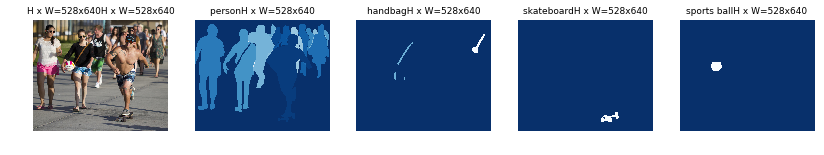

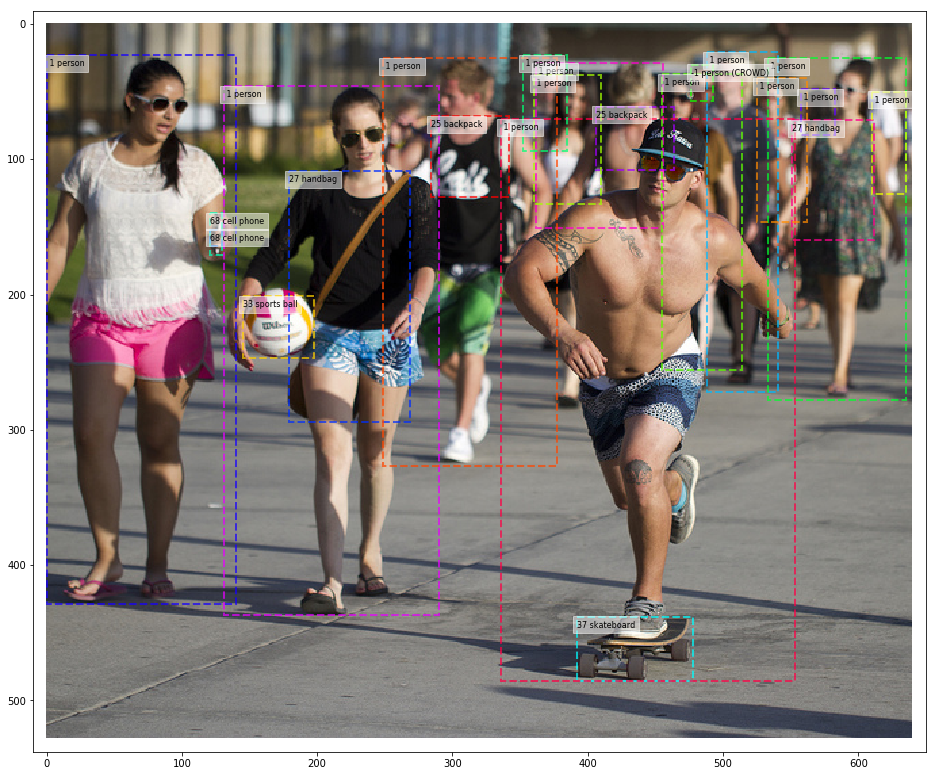

 Image_id    :  25735  Reference:  http://cocodataset.org/#explore?id=365305 Coco Id: 365305
 Image meta [25735   480   640     3   128     0   896  1024     1     1]
 Class ids   :  (2,)    [54 61]
 Class Names :  ['pizza', 'dining table']


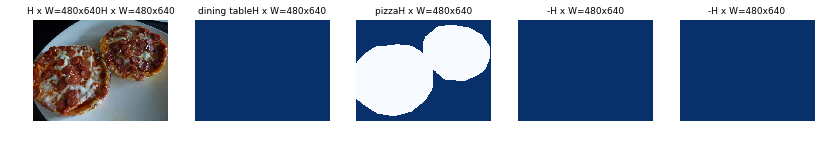

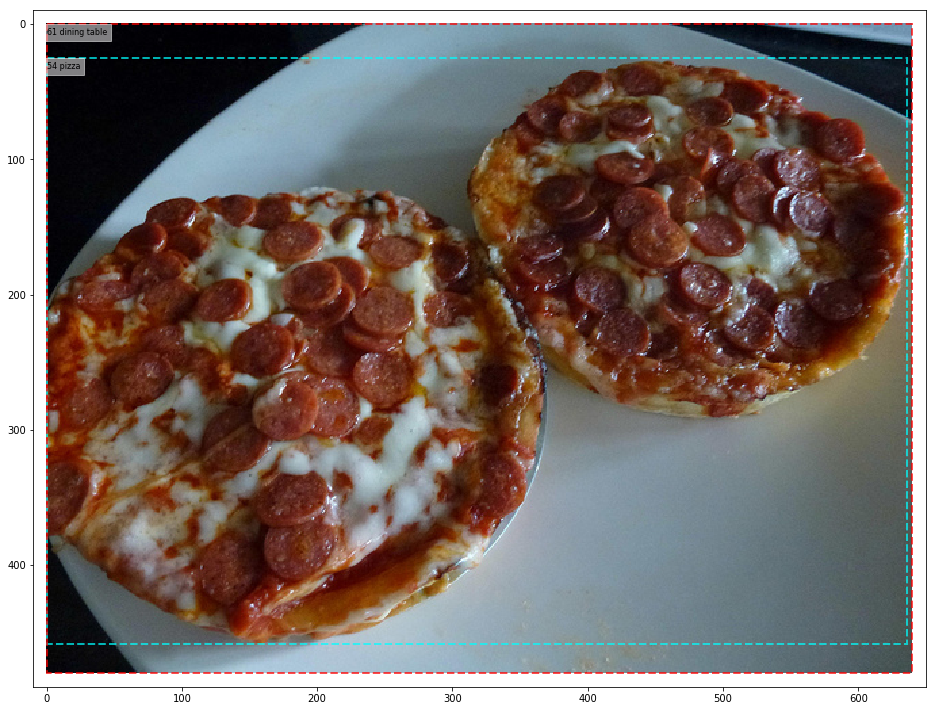

 Image_id    :  6467  Reference:  http://cocodataset.org/#explore?id=425114 Coco Id: 425114
 Image meta [6467  426  640    3  171    0  853 1024    1    1]
 Class ids   :  (37,)    [ 61   1   1  42  42  44  56  74  74  74   1   1  41  41  41  41  41  41  41  41  41  41  41  42
  57  57  61  61  74  74  74  41  57  57  41  74 -41]
 Class Names :  ['dining table', 'person', 'person', 'cup', 'cup', 'knife', 'cake', 'book', 'book', 'book', 'person', 'person', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'cup', 'chair', 'chair', 'dining table', 'dining table', 'book', 'book', 'book', 'wine glass', 'chair', 'chair', 'wine glass', 'book', 'bottle']


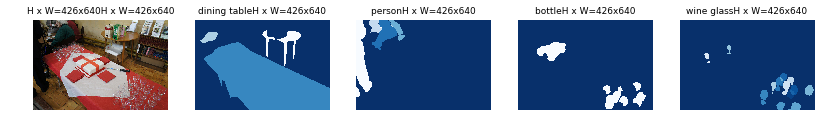

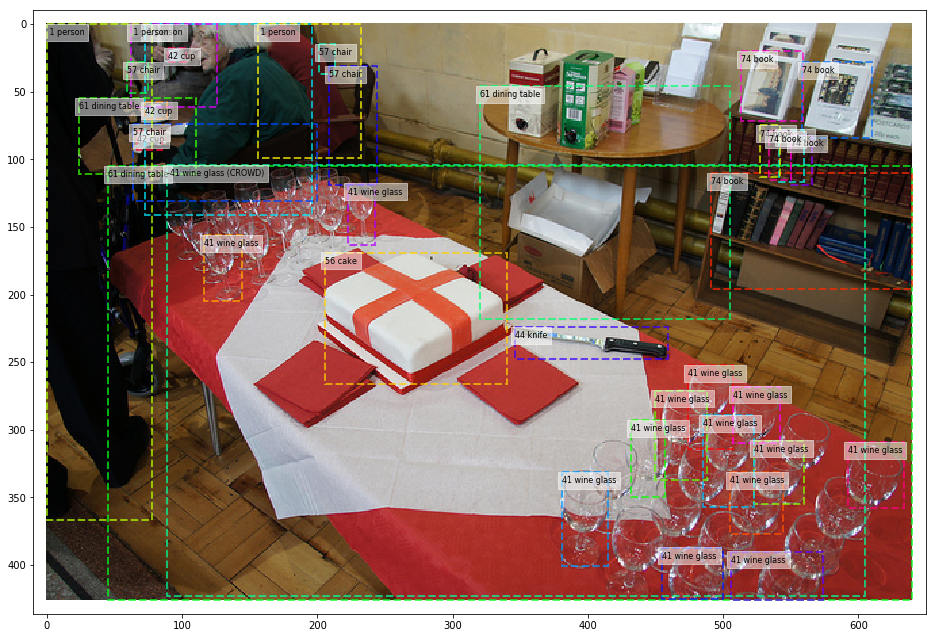

 Image_id    :  13167  Reference:  http://cocodataset.org/#explore?id=327392 Coco Id: 327392
 Image meta [13167   145   640     3   396     0   628  1024     1     1]
 Class ids   :  (22,)    [26 26 26 26 75 57 57  1  1 26 26 27 27 61  1  1  1  1  1 57 61 61]
 Class Names :  ['umbrella', 'umbrella', 'umbrella', 'umbrella', 'clock', 'chair', 'chair', 'person', 'person', 'umbrella', 'umbrella', 'handbag', 'handbag', 'dining table', 'person', 'person', 'person', 'person', 'person', 'chair', 'dining table', 'dining table']


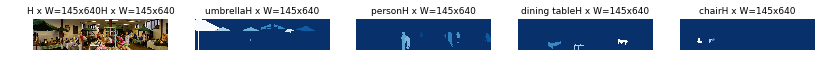

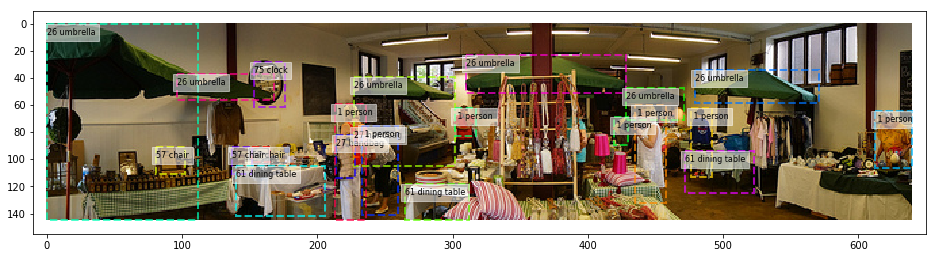

In [34]:
# batch_x, batch_y = next(generator)
IMAGE_LIST = batch_x[1][:,0]
print(IMAGE_LIST)
# IMAGE_LIST = [179, 180]
# batch_x, batch_y = data_gen_simulate(dataset, mrcnn_config, [179, 180, 181, 182])
display_training_batch(dataset, batch_x, masks = False)

In [35]:
print('IMAGE_LIST : ', IMAGE_LIST)
for image_id in IMAGE_LIST:
    print()
    print('IMAGE_ID : ', image_id)
    annotations = dataset.image_info[image_id]["annotations"]
#     print(annotations)
    for annotation in annotations:
        class_id = dataset.map_source_class_id( "coco.{}".format(annotation['category_id']))
        print("coco.id: {} --> class_id : {}  - {} ".format(annotation['category_id'],class_id, dataset.class_names[class_id]))

IMAGE_LIST :  [ 9146 25735  6467 13167]

IMAGE_ID :  9146
coco.id: 37 --> class_id : 33  - sports ball 
coco.id: 77 --> class_id : 68  - cell phone 
coco.id: 41 --> class_id : 37  - skateboard 
coco.id: 27 --> class_id : 25  - backpack 
coco.id: 31 --> class_id : 27  - handbag 
coco.id: 31 --> class_id : 27  - handbag 
coco.id: 1 --> class_id : 1  - person 
coco.id: 1 --> class_id : 1  - person 
coco.id: 1 --> class_id : 1  - person 
coco.id: 1 --> class_id : 1  - person 
coco.id: 1 --> class_id : 1  - person 
coco.id: 1 --> class_id : 1  - person 
coco.id: 1 --> class_id : 1  - person 
coco.id: 1 --> class_id : 1  - person 
coco.id: 1 --> class_id : 1  - person 
coco.id: 1 --> class_id : 1  - person 
coco.id: 27 --> class_id : 25  - backpack 
coco.id: 1 --> class_id : 1  - person 
coco.id: 1 --> class_id : 1  - person 
coco.id: 1 --> class_id : 1  - person 
coco.id: 77 --> class_id : 68  - cell phone 
coco.id: 1 --> class_id : 1  - person 

IMAGE_ID :  25735
coco.id: 59 --> class_id :

###  manipulate COCO object

In [ ]:
# coco = dataset.source_objs['train']

# loadCat = coco.loadCats()
# print('coco classes: ', type(loadCat), len(loadCat))
# pp.pprint(loadCat)

# coco_class_ids = []
# for source in dataset.source_objs:
#     print(source, dataset.source_objs[source])
#     src_coco = dataset.source_objs[source]
#     src_class_ids = sorted(src_coco.getCatIds())
#     coco_class_ids.extend(src_class_ids)
    
    
# print(type(coco_class_ids), len(coco_class_ids))    
# print(coco_class_ids)
# coco_class_ids = sorted(list(set(coco_class_ids)))
# print(type(coco_class_ids), len(coco_class_ids))    
# print(coco_class_ids)

## Build pairwise relation matrix
    - Return_coco must be set to True in coco_dataset gemneration

In [39]:
# for i in dataset.active_ext_class_ids:
#     print(i, '  --> int_id:  ', dataset.ext_to_int_id[i])
# print(dataset.active_class_ids)
print(dataset.class_ids)
print(dataset.source_objs) 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]
{'val': <pycocotools.coco.COCO object at 0x7ff701b73470>, 'train': <pycocotools.coco.COCO object at 0x7ff701b6e080>}


In [40]:
### Create pairwise matrix
matrix_class_ids = dataset.class_ids
num_classes = len(matrix_class_ids)


# pairwise_matrix = np.zeros((num_classes+1,num_classes+1))
pairwise_matrix = np.zeros((num_classes,num_classes))
pairwise_list = []
# class_pairwise_list = []
# class_pairwise_list.append({
#             "id":0,
#             "external_id": 0,
#             "name": 'BG', 
#             "category": 'background', 
#             "img_count": imgCount })
row = 1
for i in matrix_class_ids:  
#     print(' row: {:3d} '.format(i), end='\n') 
    current_row = [0]
    class_pairwise_list = []
    for  j in matrix_class_ids:
        i_coco_id = dataset.int_to_ext_id[i]
        j_coco_id = dataset.int_to_ext_id[j]
        imgCount = 0
        for source in dataset.source_objs:
            src_coco = dataset.source_objs[source]
#             print( ' int classes ', i,j, 'coco classes: ', i_coco_id, j_coco_id, type(imgCount), len(imgCount))
            imgCount += len(src_coco.getImgIds(catIds=[i_coco_id,j_coco_id]))            
            
        print( ' int classes ', i,j, 'coco classes: ', i_coco_id, j_coco_id, type(imgCount), imgCount)
#         print( ' {:2d}  [{:2d}] {:12s}-{:20s}    {:2d}  [{:2d}] {:12s}-{:20s}    number of images: {:5d}'.format(
#                  i, i_coco_id,  dataset.class_info[i]['category'], dataset.class_names[i], j, j_coco_id, dataset.class_info[j]['category'],dataset.class_names[j],imgCount))
        class_pairwise_list.append({
                    "id":j,
                    "external_id": j_coco_id,
                    "name":dataset.class_names[j], 
                    "category": dataset.class_info[j]['category'], 
                    "img_count": imgCount })
        pairwise_matrix[i,j] = imgCount    
#         current_row.append(imgCount)
        
    pairwise_list.append((i,class_pairwise_list))
#     pairwise_matrix[row] = current_row
    row += 1

print(len(pairwise_list), end = '')

 int classes  0 0 coco classes:  0 0 <class 'int'> 0
 int classes  0 1 coco classes:  0 1 <class 'int'> 0
 int classes  0 2 coco classes:  0 2 <class 'int'> 0
 int classes  0 3 coco classes:  0 3 <class 'int'> 0
 int classes  0 4 coco classes:  0 4 <class 'int'> 0
 int classes  0 5 coco classes:  0 5 <class 'int'> 0
 int classes  0 6 coco classes:  0 6 <class 'int'> 0
 int classes  0 7 coco classes:  0 7 <class 'int'> 0
 int classes  0 8 coco classes:  0 8 <class 'int'> 0
 int classes  0 9 coco classes:  0 9 <class 'int'> 0
 int classes  0 10 coco classes:  0 10 <class 'int'> 0
 int classes  0 11 coco classes:  0 11 <class 'int'> 0
 int classes  0 12 coco classes:  0 13 <class 'int'> 0
 int classes  0 13 coco classes:  0 14 <class 'int'> 0
 int classes  0 14 coco classes:  0 15 <class 'int'> 0
 int classes  0 15 coco classes:  0 16 <class 'int'> 0
 int classes  0 16 coco classes:  0 17 <class 'int'> 0
 int classes  0 17 coco classes:  0 18 <class 'int'> 0
 int classes  0 18 coco classe

 int classes  1 72 coco classes:  1 81 <class 'int'> 1043
 int classes  1 73 coco classes:  1 82 <class 'int'> 905
 int classes  1 74 coco classes:  1 84 <class 'int'> 2378
 int classes  1 75 coco classes:  1 85 <class 'int'> 1984
 int classes  1 76 coco classes:  1 86 <class 'int'> 876
 int classes  1 77 coco classes:  1 87 <class 'int'> 402
 int classes  1 78 coco classes:  1 88 <class 'int'> 888
 int classes  1 79 coco classes:  1 89 <class 'int'> 103
 int classes  1 80 coco classes:  1 90 <class 'int'> 563
 int classes  2 0 coco classes:  2 0 <class 'int'> 0
 int classes  2 1 coco classes:  2 1 <class 'int'> 2765
 int classes  2 2 coco classes:  2 2 <class 'int'> 3401
 int classes  2 3 coco classes:  2 3 <class 'int'> 1287
 int classes  2 4 coco classes:  2 4 <class 'int'> 478
 int classes  2 5 coco classes:  2 5 <class 'int'> 19
 int classes  2 6 coco classes:  2 6 <class 'int'> 451
 int classes  2 7 coco classes:  2 7 <class 'int'> 111
 int classes  2 8 coco classes:  2 8 <class 

 int classes  4 0 coco classes:  4 0 <class 'int'> 0
 int classes  4 1 coco classes:  4 1 <class 'int'> 2914
 int classes  4 2 coco classes:  4 2 <class 'int'> 478
 int classes  4 3 coco classes:  4 3 <class 'int'> 1436
 int classes  4 4 coco classes:  4 4 <class 'int'> 3661
 int classes  4 5 coco classes:  4 5 <class 'int'> 17
 int classes  4 6 coco classes:  4 6 <class 'int'> 313
 int classes  4 7 coco classes:  4 7 <class 'int'> 27
 int classes  4 8 coco classes:  4 8 <class 'int'> 662
 int classes  4 9 coco classes:  4 9 <class 'int'> 24
 int classes  4 10 coco classes:  4 10 <class 'int'> 337
 int classes  4 11 coco classes:  4 11 <class 'int'> 44
 int classes  4 12 coco classes:  4 13 <class 'int'> 83
 int classes  4 13 coco classes:  4 14 <class 'int'> 34
 int classes  4 14 coco classes:  4 15 <class 'int'> 124
 int classes  4 15 coco classes:  4 16 <class 'int'> 27
 int classes  4 16 coco classes:  4 17 <class 'int'> 39
 int classes  4 17 coco classes:  4 18 <class 'int'> 111
 

 int classes  6 38 coco classes:  6 42 <class 'int'> 12
 int classes  6 39 coco classes:  6 43 <class 'int'> 8
 int classes  6 40 coco classes:  6 44 <class 'int'> 34
 int classes  6 41 coco classes:  6 46 <class 'int'> 1
 int classes  6 42 coco classes:  6 47 <class 'int'> 18
 int classes  6 43 coco classes:  6 48 <class 'int'> 1
 int classes  6 44 coco classes:  6 49 <class 'int'> 2
 int classes  6 45 coco classes:  6 50 <class 'int'> 1
 int classes  6 46 coco classes:  6 51 <class 'int'> 5
 int classes  6 47 coco classes:  6 52 <class 'int'> 12
 int classes  6 48 coco classes:  6 53 <class 'int'> 8
 int classes  6 49 coco classes:  6 54 <class 'int'> 8
 int classes  6 50 coco classes:  6 55 <class 'int'> 10
 int classes  6 51 coco classes:  6 56 <class 'int'> 0
 int classes  6 52 coco classes:  6 57 <class 'int'> 2
 int classes  6 53 coco classes:  6 58 <class 'int'> 8
 int classes  6 54 coco classes:  6 59 <class 'int'> 3
 int classes  6 55 coco classes:  6 60 <class 'int'> 8
 int 

 int classes  9 1 coco classes:  9 1 <class 'int'> 2063
 int classes  9 2 coco classes:  9 2 <class 'int'> 129
 int classes  9 3 coco classes:  9 3 <class 'int'> 277
 int classes  9 4 coco classes:  9 4 <class 'int'> 24
 int classes  9 5 coco classes:  9 5 <class 'int'> 80
 int classes  9 6 coco classes:  9 6 <class 'int'> 60
 int classes  9 7 coco classes:  9 7 <class 'int'> 59
 int classes  9 8 coco classes:  9 8 <class 'int'> 154
 int classes  9 9 coco classes:  9 9 <class 'int'> 3146
 int classes  9 10 coco classes:  9 10 <class 'int'> 13
 int classes  9 11 coco classes:  9 11 <class 'int'> 7
 int classes  9 12 coco classes:  9 13 <class 'int'> 6
 int classes  9 13 coco classes:  9 14 <class 'int'> 3
 int classes  9 14 coco classes:  9 15 <class 'int'> 211
 int classes  9 15 coco classes:  9 16 <class 'int'> 245
 int classes  9 16 coco classes:  9 17 <class 'int'> 5
 int classes  9 17 coco classes:  9 18 <class 'int'> 161
 int classes  9 18 coco classes:  9 19 <class 'int'> 38
 int

 int classes  13 66 coco classes:  14 75 <class 'int'> 0
 int classes  13 67 coco classes:  14 76 <class 'int'> 1
 int classes  13 68 coco classes:  14 77 <class 'int'> 13
 int classes  13 69 coco classes:  14 78 <class 'int'> 1
 int classes  13 70 coco classes:  14 79 <class 'int'> 0
 int classes  13 71 coco classes:  14 80 <class 'int'> 0
 int classes  13 72 coco classes:  14 81 <class 'int'> 0
 int classes  13 73 coco classes:  14 82 <class 'int'> 0
 int classes  13 74 coco classes:  14 84 <class 'int'> 3
 int classes  13 75 coco classes:  14 85 <class 'int'> 9
 int classes  13 76 coco classes:  14 86 <class 'int'> 3
 int classes  13 77 coco classes:  14 87 <class 'int'> 0
 int classes  13 78 coco classes:  14 88 <class 'int'> 0
 int classes  13 79 coco classes:  14 89 <class 'int'> 0
 int classes  13 80 coco classes:  14 90 <class 'int'> 0
 int classes  14 0 coco classes:  15 0 <class 'int'> 0
 int classes  14 1 coco classes:  15 1 <class 'int'> 4273
 int classes  14 2 coco classes

 int classes  16 14 coco classes:  17 15 <class 'int'> 149
 int classes  16 15 coco classes:  17 16 <class 'int'> 77
 int classes  16 16 coco classes:  17 17 <class 'int'> 4298
 int classes  16 17 coco classes:  17 18 <class 'int'> 220
 int classes  16 18 coco classes:  17 19 <class 'int'> 6
 int classes  16 19 coco classes:  17 20 <class 'int'> 13
 int classes  16 20 coco classes:  17 21 <class 'int'> 4
 int classes  16 21 coco classes:  17 22 <class 'int'> 3
 int classes  16 22 coco classes:  17 23 <class 'int'> 3
 int classes  16 23 coco classes:  17 24 <class 'int'> 3
 int classes  16 24 coco classes:  17 25 <class 'int'> 1
 int classes  16 25 coco classes:  17 27 <class 'int'> 92
 int classes  16 26 coco classes:  17 28 <class 'int'> 58
 int classes  16 27 coco classes:  17 31 <class 'int'> 128
 int classes  16 28 coco classes:  17 32 <class 'int'> 46
 int classes  16 29 coco classes:  17 33 <class 'int'> 224
 int classes  16 30 coco classes:  17 34 <class 'int'> 1
 int classes  1

 int classes  18 23 coco classes:  19 24 <class 'int'> 17
 int classes  18 24 coco classes:  19 25 <class 'int'> 6
 int classes  18 25 coco classes:  19 27 <class 'int'> 97
 int classes  18 26 coco classes:  19 28 <class 'int'> 81
 int classes  18 27 coco classes:  19 31 <class 'int'> 135
 int classes  18 28 coco classes:  19 32 <class 'int'> 136
 int classes  18 29 coco classes:  19 33 <class 'int'> 11
 int classes  18 30 coco classes:  19 34 <class 'int'> 1
 int classes  18 31 coco classes:  19 35 <class 'int'> 8
 int classes  18 32 coco classes:  19 36 <class 'int'> 1
 int classes  18 33 coco classes:  19 37 <class 'int'> 15
 int classes  18 34 coco classes:  19 38 <class 'int'> 1
 int classes  18 35 coco classes:  19 39 <class 'int'> 0
 int classes  18 36 coco classes:  19 40 <class 'int'> 1
 int classes  18 37 coco classes:  19 41 <class 'int'> 1
 int classes  18 38 coco classes:  19 42 <class 'int'> 1
 int classes  18 39 coco classes:  19 43 <class 'int'> 1
 int classes  18 40 co

 int classes  20 78 coco classes:  21 88 <class 'int'> 5
 int classes  20 79 coco classes:  21 89 <class 'int'> 1
 int classes  20 80 coco classes:  21 90 <class 'int'> 0
 int classes  21 0 coco classes:  22 0 <class 'int'> 0
 int classes  21 1 coco classes:  22 1 <class 'int'> 899
 int classes  21 2 coco classes:  22 2 <class 'int'> 25
 int classes  21 3 coco classes:  22 3 <class 'int'> 114
 int classes  21 4 coco classes:  22 4 <class 'int'> 38
 int classes  21 5 coco classes:  22 5 <class 'int'> 1
 int classes  21 6 coco classes:  22 6 <class 'int'> 16
 int classes  21 7 coco classes:  22 7 <class 'int'> 11
 int classes  21 8 coco classes:  22 8 <class 'int'> 56
 int classes  21 9 coco classes:  22 9 <class 'int'> 16
 int classes  21 10 coco classes:  22 10 <class 'int'> 11
 int classes  21 11 coco classes:  22 11 <class 'int'> 1
 int classes  21 12 coco classes:  22 13 <class 'int'> 5
 int classes  21 13 coco classes:  22 14 <class 'int'> 0
 int classes  21 14 coco classes:  22 15

 int classes  23 56 coco classes:  24 61 <class 'int'> 2
 int classes  23 57 coco classes:  24 62 <class 'int'> 7
 int classes  23 58 coco classes:  24 63 <class 'int'> 1
 int classes  23 59 coco classes:  24 64 <class 'int'> 8
 int classes  23 60 coco classes:  24 65 <class 'int'> 0
 int classes  23 61 coco classes:  24 67 <class 'int'> 4
 int classes  23 62 coco classes:  24 70 <class 'int'> 0
 int classes  23 63 coco classes:  24 72 <class 'int'> 0
 int classes  23 64 coco classes:  24 73 <class 'int'> 0
 int classes  23 65 coco classes:  24 74 <class 'int'> 0
 int classes  23 66 coco classes:  24 75 <class 'int'> 0
 int classes  23 67 coco classes:  24 76 <class 'int'> 0
 int classes  23 68 coco classes:  24 77 <class 'int'> 2
 int classes  23 69 coco classes:  24 78 <class 'int'> 0
 int classes  23 70 coco classes:  24 79 <class 'int'> 0
 int classes  23 71 coco classes:  24 80 <class 'int'> 0
 int classes  23 72 coco classes:  24 81 <class 'int'> 0
 int classes  23 73 coco classe

 int classes  26 18 coco classes:  28 19 <class 'int'> 81
 int classes  26 19 coco classes:  28 20 <class 'int'> 8
 int classes  26 20 coco classes:  28 21 <class 'int'> 29
 int classes  26 21 coco classes:  28 22 <class 'int'> 55
 int classes  26 22 coco classes:  28 23 <class 'int'> 2
 int classes  26 23 coco classes:  28 24 <class 'int'> 8
 int classes  26 24 coco classes:  28 25 <class 'int'> 18
 int classes  26 25 coco classes:  28 27 <class 'int'> 528
 int classes  26 26 coco classes:  28 28 <class 'int'> 4142
 int classes  26 27 coco classes:  28 31 <class 'int'> 1194
 int classes  26 28 coco classes:  28 32 <class 'int'> 136
 int classes  26 29 coco classes:  28 33 <class 'int'> 90
 int classes  26 30 coco classes:  28 34 <class 'int'> 62
 int classes  26 31 coco classes:  28 35 <class 'int'> 8
 int classes  26 32 coco classes:  28 36 <class 'int'> 2
 int classes  26 33 coco classes:  28 37 <class 'int'> 104
 int classes  26 34 coco classes:  28 38 <class 'int'> 93
 int classes

 int classes  28 11 coco classes:  32 11 <class 'int'> 9
 int classes  28 12 coco classes:  32 13 <class 'int'> 10
 int classes  28 13 coco classes:  32 14 <class 'int'> 7
 int classes  28 14 coco classes:  32 15 <class 'int'> 154
 int classes  28 15 coco classes:  32 16 <class 'int'> 18
 int classes  28 16 coco classes:  32 17 <class 'int'> 46
 int classes  28 17 coco classes:  32 18 <class 'int'> 63
 int classes  28 18 coco classes:  32 19 <class 'int'> 136
 int classes  28 19 coco classes:  32 20 <class 'int'> 17
 int classes  28 20 coco classes:  32 21 <class 'int'> 23
 int classes  28 21 coco classes:  32 22 <class 'int'> 15
 int classes  28 22 coco classes:  32 23 <class 'int'> 1
 int classes  28 23 coco classes:  32 24 <class 'int'> 5
 int classes  28 24 coco classes:  32 25 <class 'int'> 2
 int classes  28 25 coco classes:  32 27 <class 'int'> 187
 int classes  28 26 coco classes:  32 28 <class 'int'> 136
 int classes  28 27 coco classes:  32 31 <class 'int'> 439
 int classes  

 int classes  30 24 coco classes:  34 25 <class 'int'> 0
 int classes  30 25 coco classes:  34 27 <class 'int'> 129
 int classes  30 26 coco classes:  34 28 <class 'int'> 62
 int classes  30 27 coco classes:  34 31 <class 'int'> 83
 int classes  30 28 coco classes:  34 32 <class 'int'> 6
 int classes  30 29 coco classes:  34 33 <class 'int'> 4
 int classes  30 30 coco classes:  34 34 <class 'int'> 2268
 int classes  30 31 coco classes:  34 35 <class 'int'> 0
 int classes  30 32 coco classes:  34 36 <class 'int'> 0
 int classes  30 33 coco classes:  34 37 <class 'int'> 39
 int classes  30 34 coco classes:  34 38 <class 'int'> 8
 int classes  30 35 coco classes:  34 39 <class 'int'> 3
 int classes  30 36 coco classes:  34 40 <class 'int'> 1
 int classes  30 37 coco classes:  34 41 <class 'int'> 1
 int classes  30 38 coco classes:  34 42 <class 'int'> 1
 int classes  30 39 coco classes:  34 43 <class 'int'> 5
 int classes  30 40 coco classes:  34 44 <class 'int'> 63
 int classes  30 41 co

 int classes  33 1 coco classes:  37 1 <class 'int'> 4256
 int classes  33 2 coco classes:  37 2 <class 'int'> 45
 int classes  33 3 coco classes:  37 3 <class 'int'> 311
 int classes  33 4 coco classes:  37 4 <class 'int'> 12
 int classes  33 5 coco classes:  37 5 <class 'int'> 2
 int classes  33 6 coco classes:  37 6 <class 'int'> 15
 int classes  33 7 coco classes:  37 7 <class 'int'> 2
 int classes  33 8 coco classes:  37 8 <class 'int'> 77
 int classes  33 9 coco classes:  37 9 <class 'int'> 26
 int classes  33 10 coco classes:  37 10 <class 'int'> 11
 int classes  33 11 coco classes:  37 11 <class 'int'> 11
 int classes  33 12 coco classes:  37 13 <class 'int'> 6
 int classes  33 13 coco classes:  37 14 <class 'int'> 1
 int classes  33 14 coco classes:  37 15 <class 'int'> 442
 int classes  33 15 coco classes:  37 16 <class 'int'> 9
 int classes  33 16 coco classes:  37 17 <class 'int'> 18
 int classes  33 17 coco classes:  37 18 <class 'int'> 86
 int classes  33 18 coco classes:

 int classes  35 22 coco classes:  39 23 <class 'int'> 0
 int classes  35 23 coco classes:  39 24 <class 'int'> 0
 int classes  35 24 coco classes:  39 25 <class 'int'> 0
 int classes  35 25 coco classes:  39 27 <class 'int'> 69
 int classes  35 26 coco classes:  39 28 <class 'int'> 21
 int classes  35 27 coco classes:  39 31 <class 'int'> 38
 int classes  35 28 coco classes:  39 32 <class 'int'> 31
 int classes  35 29 coco classes:  39 33 <class 'int'> 3
 int classes  35 30 coco classes:  39 34 <class 'int'> 3
 int classes  35 31 coco classes:  39 35 <class 'int'> 0
 int classes  35 32 coco classes:  39 36 <class 'int'> 0
 int classes  35 33 coco classes:  39 37 <class 'int'> 971
 int classes  35 34 coco classes:  39 38 <class 'int'> 0
 int classes  35 35 coco classes:  39 39 <class 'int'> 2603
 int classes  35 36 coco classes:  39 40 <class 'int'> 1724
 int classes  35 37 coco classes:  39 41 <class 'int'> 1
 int classes  35 38 coco classes:  39 42 <class 'int'> 0
 int classes  35 39

 int classes  37 75 coco classes:  41 85 <class 'int'> 13
 int classes  37 76 coco classes:  41 86 <class 'int'> 3
 int classes  37 77 coco classes:  41 87 <class 'int'> 0
 int classes  37 78 coco classes:  41 88 <class 'int'> 3
 int classes  37 79 coco classes:  41 89 <class 'int'> 0
 int classes  37 80 coco classes:  41 90 <class 'int'> 0
 int classes  38 0 coco classes:  42 0 <class 'int'> 0
 int classes  38 1 coco classes:  42 1 <class 'int'> 3507
 int classes  38 2 coco classes:  42 2 <class 'int'> 41
 int classes  38 3 coco classes:  42 3 <class 'int'> 137
 int classes  38 4 coco classes:  42 4 <class 'int'> 7
 int classes  38 5 coco classes:  42 5 <class 'int'> 3
 int classes  38 6 coco classes:  42 6 <class 'int'> 12
 int classes  38 7 coco classes:  42 7 <class 'int'> 2
 int classes  38 8 coco classes:  42 8 <class 'int'> 49
 int classes  38 9 coco classes:  42 9 <class 'int'> 182
 int classes  38 10 coco classes:  42 10 <class 'int'> 8
 int classes  38 11 coco classes:  42 11

 int classes  40 64 coco classes:  44 73 <class 'int'> 577
 int classes  40 65 coco classes:  44 74 <class 'int'> 289
 int classes  40 66 coco classes:  44 75 <class 'int'> 442
 int classes  40 67 coco classes:  44 76 <class 'int'> 293
 int classes  40 68 coco classes:  44 77 <class 'int'> 651
 int classes  40 69 coco classes:  44 78 <class 'int'> 621
 int classes  40 70 coco classes:  44 79 <class 'int'> 1177
 int classes  40 71 coco classes:  44 80 <class 'int'> 119
 int classes  40 72 coco classes:  44 81 <class 'int'> 1848
 int classes  40 73 coco classes:  44 82 <class 'int'> 1040
 int classes  40 74 coco classes:  44 84 <class 'int'> 962
 int classes  40 75 coco classes:  44 85 <class 'int'> 455
 int classes  40 76 coco classes:  44 86 <class 'int'> 719
 int classes  40 77 coco classes:  44 87 <class 'int'> 161
 int classes  40 78 coco classes:  44 88 <class 'int'> 136
 int classes  40 79 coco classes:  44 89 <class 'int'> 48
 int classes  40 80 coco classes:  44 90 <class 'int'>

 int classes  42 45 coco classes:  47 50 <class 'int'> 1952
 int classes  42 46 coco classes:  47 51 <class 'int'> 2934
 int classes  42 47 coco classes:  47 52 <class 'int'> 319
 int classes  42 48 coco classes:  47 53 <class 'int'> 253
 int classes  42 49 coco classes:  47 54 <class 'int'> 1000
 int classes  42 50 coco classes:  47 55 <class 'int'> 296
 int classes  42 51 coco classes:  47 56 <class 'int'> 280
 int classes  42 52 coco classes:  47 57 <class 'int'> 342
 int classes  42 53 coco classes:  47 58 <class 'int'> 309
 int classes  42 54 coco classes:  47 59 <class 'int'> 1063
 int classes  42 55 coco classes:  47 60 <class 'int'> 416
 int classes  42 56 coco classes:  47 61 <class 'int'> 868
 int classes  42 57 coco classes:  47 62 <class 'int'> 3076
 int classes  42 58 coco classes:  47 63 <class 'int'> 752
 int classes  42 59 coco classes:  47 64 <class 'int'> 820
 int classes  42 60 coco classes:  47 65 <class 'int'> 231
 int classes  42 61 coco classes:  47 67 <class 'in

 int classes  44 42 coco classes:  49 47 <class 'int'> 2099
 int classes  44 43 coco classes:  49 48 <class 'int'> 1871
 int classes  44 44 coco classes:  49 49 <class 'int'> 4507
 int classes  44 45 coco classes:  49 50 <class 'int'> 1251
 int classes  44 46 coco classes:  49 51 <class 'int'> 1690
 int classes  44 47 coco classes:  49 52 <class 'int'> 164
 int classes  44 48 coco classes:  49 53 <class 'int'> 213
 int classes  44 49 coco classes:  49 54 <class 'int'> 600
 int classes  44 50 coco classes:  49 55 <class 'int'> 171
 int classes  44 51 coco classes:  49 56 <class 'int'> 238
 int classes  44 52 coco classes:  49 57 <class 'int'> 332
 int classes  44 53 coco classes:  49 58 <class 'int'> 78
 int classes  44 54 coco classes:  49 59 <class 'int'> 854
 int classes  44 55 coco classes:  49 60 <class 'int'> 94
 int classes  44 56 coco classes:  49 61 <class 'int'> 939
 int classes  44 57 coco classes:  49 62 <class 'int'> 1217
 int classes  44 58 coco classes:  49 63 <class 'int

 int classes  46 63 coco classes:  51 72 <class 'int'> 354
 int classes  46 64 coco classes:  51 73 <class 'int'> 216
 int classes  46 65 coco classes:  51 74 <class 'int'> 63
 int classes  46 66 coco classes:  51 75 <class 'int'> 189
 int classes  46 67 coco classes:  51 76 <class 'int'> 81
 int classes  46 68 coco classes:  51 77 <class 'int'> 318
 int classes  46 69 coco classes:  51 78 <class 'int'> 551
 int classes  46 70 coco classes:  51 79 <class 'int'> 1143
 int classes  46 71 coco classes:  51 80 <class 'int'> 97
 int classes  46 72 coco classes:  51 81 <class 'int'> 1036
 int classes  46 73 coco classes:  51 82 <class 'int'> 742
 int classes  46 74 coco classes:  51 84 <class 'int'> 619
 int classes  46 75 coco classes:  51 85 <class 'int'> 301
 int classes  46 76 coco classes:  51 86 <class 'int'> 676
 int classes  46 77 coco classes:  51 87 <class 'int'> 118
 int classes  46 78 coco classes:  51 88 <class 'int'> 72
 int classes  46 79 coco classes:  51 89 <class 'int'> 11


 int classes  49 32 coco classes:  54 36 <class 'int'> 0
 int classes  49 33 coco classes:  54 37 <class 'int'> 2
 int classes  49 34 coco classes:  54 38 <class 'int'> 1
 int classes  49 35 coco classes:  54 39 <class 'int'> 1
 int classes  49 36 coco classes:  54 40 <class 'int'> 0
 int classes  49 37 coco classes:  54 41 <class 'int'> 2
 int classes  49 38 coco classes:  54 42 <class 'int'> 0
 int classes  49 39 coco classes:  54 43 <class 'int'> 0
 int classes  49 40 coco classes:  54 44 <class 'int'> 489
 int classes  49 41 coco classes:  54 46 <class 'int'> 201
 int classes  49 42 coco classes:  54 47 <class 'int'> 1000
 int classes  49 43 coco classes:  54 48 <class 'int'> 653
 int classes  49 44 coco classes:  54 49 <class 'int'> 600
 int classes  49 45 coco classes:  54 50 <class 'int'> 497
 int classes  49 46 coco classes:  54 51 <class 'int'> 768
 int classes  49 47 coco classes:  54 52 <class 'int'> 70
 int classes  49 48 coco classes:  54 53 <class 'int'> 73
 int classes  

 int classes  51 65 coco classes:  56 74 <class 'int'> 1
 int classes  51 66 coco classes:  56 75 <class 'int'> 4
 int classes  51 67 coco classes:  56 76 <class 'int'> 6
 int classes  51 68 coco classes:  56 77 <class 'int'> 10
 int classes  51 69 coco classes:  56 78 <class 'int'> 14
 int classes  51 70 coco classes:  56 79 <class 'int'> 62
 int classes  51 71 coco classes:  56 80 <class 'int'> 3
 int classes  51 72 coco classes:  56 81 <class 'int'> 32
 int classes  51 73 coco classes:  56 82 <class 'int'> 17
 int classes  51 74 coco classes:  56 84 <class 'int'> 29
 int classes  51 75 coco classes:  56 85 <class 'int'> 9
 int classes  51 76 coco classes:  56 86 <class 'int'> 13
 int classes  51 77 coco classes:  56 87 <class 'int'> 6
 int classes  51 78 coco classes:  56 88 <class 'int'> 2
 int classes  51 79 coco classes:  56 89 <class 'int'> 0
 int classes  51 80 coco classes:  56 90 <class 'int'> 0
 int classes  52 0 coco classes:  57 0 <class 'int'> 0
 int classes  52 1 coco cl

 int classes  54 27 coco classes:  59 31 <class 'int'> 99
 int classes  54 28 coco classes:  59 32 <class 'int'> 20
 int classes  54 29 coco classes:  59 33 <class 'int'> 5
 int classes  54 30 coco classes:  59 34 <class 'int'> 2
 int classes  54 31 coco classes:  59 35 <class 'int'> 0
 int classes  54 32 coco classes:  59 36 <class 'int'> 0
 int classes  54 33 coco classes:  59 37 <class 'int'> 6
 int classes  54 34 coco classes:  59 38 <class 'int'> 0
 int classes  54 35 coco classes:  59 39 <class 'int'> 0
 int classes  54 36 coco classes:  59 40 <class 'int'> 1
 int classes  54 37 coco classes:  59 41 <class 'int'> 2
 int classes  54 38 coco classes:  59 42 <class 'int'> 2
 int classes  54 39 coco classes:  59 43 <class 'int'> 0
 int classes  54 40 coco classes:  59 44 <class 'int'> 698
 int classes  54 41 coco classes:  59 46 <class 'int'> 305
 int classes  54 42 coco classes:  59 47 <class 'int'> 1063
 int classes  54 43 coco classes:  59 48 <class 'int'> 801
 int classes  54 44 

 int classes  56 39 coco classes:  61 43 <class 'int'> 0
 int classes  56 40 coco classes:  61 44 <class 'int'> 435
 int classes  56 41 coco classes:  61 46 <class 'int'> 254
 int classes  56 42 coco classes:  61 47 <class 'int'> 868
 int classes  56 43 coco classes:  61 48 <class 'int'> 736
 int classes  56 44 coco classes:  61 49 <class 'int'> 939
 int classes  56 45 coco classes:  61 50 <class 'int'> 547
 int classes  56 46 coco classes:  61 51 <class 'int'> 638
 int classes  56 47 coco classes:  61 52 <class 'int'> 80
 int classes  56 48 coco classes:  61 53 <class 'int'> 58
 int classes  56 49 coco classes:  61 54 <class 'int'> 151
 int classes  56 50 coco classes:  61 55 <class 'int'> 101
 int classes  56 51 coco classes:  61 56 <class 'int'> 38
 int classes  56 52 coco classes:  61 57 <class 'int'> 71
 int classes  56 53 coco classes:  61 58 <class 'int'> 31
 int classes  56 54 coco classes:  61 59 <class 'int'> 45
 int classes  56 55 coco classes:  61 60 <class 'int'> 185
 int 

 int classes  58 73 coco classes:  63 82 <class 'int'> 187
 int classes  58 74 coco classes:  63 84 <class 'int'> 1423
 int classes  58 75 coco classes:  63 85 <class 'int'> 364
 int classes  58 76 coco classes:  63 86 <class 'int'> 812
 int classes  58 77 coco classes:  63 87 <class 'int'> 28
 int classes  58 78 coco classes:  63 88 <class 'int'> 217
 int classes  58 79 coco classes:  63 89 <class 'int'> 10
 int classes  58 80 coco classes:  63 90 <class 'int'> 31
 int classes  59 0 coco classes:  64 0 <class 'int'> 0
 int classes  59 1 coco classes:  64 1 <class 'int'> 2037
 int classes  59 2 coco classes:  64 2 <class 'int'> 152
 int classes  59 3 coco classes:  64 3 <class 'int'> 372
 int classes  59 4 coco classes:  64 4 <class 'int'> 120
 int classes  59 5 coco classes:  64 5 <class 'int'> 11
 int classes  59 6 coco classes:  64 6 <class 'int'> 85
 int classes  59 7 coco classes:  64 7 <class 'int'> 39
 int classes  59 8 coco classes:  64 8 <class 'int'> 134
 int classes  59 9 co

 int classes  61 5 coco classes:  67 5 <class 'int'> 13
 int classes  61 6 coco classes:  67 6 <class 'int'> 33
 int classes  61 7 coco classes:  67 7 <class 'int'> 19
 int classes  61 8 coco classes:  67 8 <class 'int'> 99
 int classes  61 9 coco classes:  67 9 <class 'int'> 69
 int classes  61 10 coco classes:  67 10 <class 'int'> 29
 int classes  61 11 coco classes:  67 11 <class 'int'> 13
 int classes  61 12 coco classes:  67 13 <class 'int'> 11
 int classes  61 13 coco classes:  67 14 <class 'int'> 16
 int classes  61 14 coco classes:  67 15 <class 'int'> 446
 int classes  61 15 coco classes:  67 16 <class 'int'> 97
 int classes  61 16 coco classes:  67 17 <class 'int'> 230
 int classes  61 17 coco classes:  67 18 <class 'int'> 231
 int classes  61 18 coco classes:  67 19 <class 'int'> 36
 int classes  61 19 coco classes:  67 20 <class 'int'> 11
 int classes  61 20 coco classes:  67 21 <class 'int'> 17
 int classes  61 21 coco classes:  67 22 <class 'int'> 12
 int classes  61 22 c

 int classes  63 42 coco classes:  72 47 <class 'int'> 893
 int classes  63 43 coco classes:  72 48 <class 'int'> 72
 int classes  63 44 coco classes:  72 49 <class 'int'> 99
 int classes  63 45 coco classes:  72 50 <class 'int'> 80
 int classes  63 46 coco classes:  72 51 <class 'int'> 354
 int classes  63 47 coco classes:  72 52 <class 'int'> 33
 int classes  63 48 coco classes:  72 53 <class 'int'> 51
 int classes  63 49 coco classes:  72 54 <class 'int'> 33
 int classes  63 50 coco classes:  72 55 <class 'int'> 44
 int classes  63 51 coco classes:  72 56 <class 'int'> 9
 int classes  63 52 coco classes:  72 57 <class 'int'> 13
 int classes  63 53 coco classes:  72 58 <class 'int'> 13
 int classes  63 54 coco classes:  72 59 <class 'int'> 58
 int classes  63 55 coco classes:  72 60 <class 'int'> 29
 int classes  63 56 coco classes:  72 61 <class 'int'> 83
 int classes  63 57 coco classes:  72 62 <class 'int'> 2075
 int classes  63 58 coco classes:  72 63 <class 'int'> 1328
 int clas

 int classes  65 54 coco classes:  74 59 <class 'int'> 14
 int classes  65 55 coco classes:  74 60 <class 'int'> 10
 int classes  65 56 coco classes:  74 61 <class 'int'> 17
 int classes  65 57 coco classes:  74 62 <class 'int'> 740
 int classes  65 58 coco classes:  74 63 <class 'int'> 133
 int classes  65 59 coco classes:  74 64 <class 'int'> 132
 int classes  65 60 coco classes:  74 65 <class 'int'> 88
 int classes  65 61 coco classes:  74 67 <class 'int'> 160
 int classes  65 62 coco classes:  74 70 <class 'int'> 2
 int classes  65 63 coco classes:  74 72 <class 'int'> 1120
 int classes  65 64 coco classes:  74 73 <class 'int'> 1126
 int classes  65 65 coco classes:  74 74 <class 'int'> 1964
 int classes  65 66 coco classes:  74 75 <class 'int'> 231
 int classes  65 67 coco classes:  74 76 <class 'int'> 1354
 int classes  65 68 coco classes:  74 77 <class 'int'> 455
 int classes  65 69 coco classes:  74 78 <class 'int'> 11
 int classes  65 70 coco classes:  74 79 <class 'int'> 10
 

 int classes  67 61 coco classes:  76 67 <class 'int'> 168
 int classes  67 62 coco classes:  76 70 <class 'int'> 3
 int classes  67 63 coco classes:  76 72 <class 'int'> 1317
 int classes  67 64 coco classes:  76 73 <class 'int'> 1031
 int classes  67 65 coco classes:  76 74 <class 'int'> 1354
 int classes  67 66 coco classes:  76 75 <class 'int'> 255
 int classes  67 67 coco classes:  76 76 <class 'int'> 2221
 int classes  67 68 coco classes:  76 77 <class 'int'> 453
 int classes  67 69 coco classes:  76 78 <class 'int'> 20
 int classes  67 70 coco classes:  76 79 <class 'int'> 11
 int classes  67 71 coco classes:  76 80 <class 'int'> 1
 int classes  67 72 coco classes:  76 81 <class 'int'> 16
 int classes  67 73 coco classes:  76 82 <class 'int'> 23
 int classes  67 74 coco classes:  76 84 <class 'int'> 696
 int classes  67 75 coco classes:  76 85 <class 'int'> 98
 int classes  67 76 coco classes:  76 86 <class 'int'> 58
 int classes  67 77 coco classes:  76 87 <class 'int'> 75
 int

 int classes  70 41 coco classes:  79 46 <class 'int'> 186
 int classes  70 42 coco classes:  79 47 <class 'int'> 837
 int classes  70 43 coco classes:  79 48 <class 'int'> 101
 int classes  70 44 coco classes:  79 49 <class 'int'> 584
 int classes  70 45 coco classes:  79 50 <class 'int'> 638
 int classes  70 46 coco classes:  79 51 <class 'int'> 1143
 int classes  70 47 coco classes:  79 52 <class 'int'> 121
 int classes  70 48 coco classes:  79 53 <class 'int'> 131
 int classes  70 49 coco classes:  79 54 <class 'int'> 43
 int classes  70 50 coco classes:  79 55 <class 'int'> 128
 int classes  70 51 coco classes:  79 56 <class 'int'> 62
 int classes  70 52 coco classes:  79 57 <class 'int'> 68
 int classes  70 53 coco classes:  79 58 <class 'int'> 18
 int classes  70 54 coco classes:  79 59 <class 'int'> 223
 int classes  70 55 coco classes:  79 60 <class 'int'> 32
 int classes  70 56 coco classes:  79 61 <class 'int'> 112
 int classes  70 57 coco classes:  79 62 <class 'int'> 643
 

 int classes  72 50 coco classes:  81 55 <class 'int'> 116
 int classes  72 51 coco classes:  81 56 <class 'int'> 32
 int classes  72 52 coco classes:  81 57 <class 'int'> 32
 int classes  72 53 coco classes:  81 58 <class 'int'> 8
 int classes  72 54 coco classes:  81 59 <class 'int'> 47
 int classes  72 55 coco classes:  81 60 <class 'int'> 17
 int classes  72 56 coco classes:  81 61 <class 'int'> 44
 int classes  72 57 coco classes:  81 62 <class 'int'> 664
 int classes  72 58 coco classes:  81 63 <class 'int'> 133
 int classes  72 59 coco classes:  81 64 <class 'int'> 498
 int classes  72 60 coco classes:  81 65 <class 'int'> 82
 int classes  72 61 coco classes:  81 67 <class 'int'> 536
 int classes  72 62 coco classes:  81 70 <class 'int'> 1745
 int classes  72 63 coco classes:  81 72 <class 'int'> 156
 int classes  72 64 coco classes:  81 73 <class 'int'> 68
 int classes  72 65 coco classes:  81 74 <class 'int'> 9
 int classes  72 66 coco classes:  81 75 <class 'int'> 43
 int cla

 int classes  75 1 coco classes:  85 1 <class 'int'> 1984
 int classes  75 2 coco classes:  85 2 <class 'int'> 101
 int classes  75 3 coco classes:  85 3 <class 'int'> 521
 int classes  75 4 coco classes:  85 4 <class 'int'> 52
 int classes  75 5 coco classes:  85 5 <class 'int'> 12
 int classes  75 6 coco classes:  85 6 <class 'int'> 170
 int classes  75 7 coco classes:  85 7 <class 'int'> 92
 int classes  75 8 coco classes:  85 8 <class 'int'> 147
 int classes  75 9 coco classes:  85 9 <class 'int'> 72
 int classes  75 10 coco classes:  85 10 <class 'int'> 218
 int classes  75 11 coco classes:  85 11 <class 'int'> 28
 int classes  75 12 coco classes:  85 13 <class 'int'> 26
 int classes  75 13 coco classes:  85 14 <class 'int'> 9
 int classes  75 14 coco classes:  85 15 <class 'int'> 187
 int classes  75 15 coco classes:  85 16 <class 'int'> 114
 int classes  75 16 coco classes:  85 17 <class 'int'> 65
 int classes  75 17 coco classes:  85 18 <class 'int'> 72
 int classes  75 18 coco

 int classes  77 20 coco classes:  87 21 <class 'int'> 0
 int classes  77 21 coco classes:  87 22 <class 'int'> 0
 int classes  77 22 coco classes:  87 23 <class 'int'> 0
 int classes  77 23 coco classes:  87 24 <class 'int'> 0
 int classes  77 24 coco classes:  87 25 <class 'int'> 0
 int classes  77 25 coco classes:  87 27 <class 'int'> 14
 int classes  77 26 coco classes:  87 28 <class 'int'> 7
 int classes  77 27 coco classes:  87 31 <class 'int'> 27
 int classes  77 28 coco classes:  87 32 <class 'int'> 23
 int classes  77 29 coco classes:  87 33 <class 'int'> 4
 int classes  77 30 coco classes:  87 34 <class 'int'> 1
 int classes  77 31 coco classes:  87 35 <class 'int'> 0
 int classes  77 32 coco classes:  87 36 <class 'int'> 0
 int classes  77 33 coco classes:  87 37 <class 'int'> 6
 int classes  77 34 coco classes:  87 38 <class 'int'> 4
 int classes  77 35 coco classes:  87 39 <class 'int'> 2
 int classes  77 36 coco classes:  87 40 <class 'int'> 0
 int classes  77 37 coco cla

 int classes  79 19 coco classes:  89 20 <class 'int'> 0
 int classes  79 20 coco classes:  89 21 <class 'int'> 1
 int classes  79 21 coco classes:  89 22 <class 'int'> 0
 int classes  79 22 coco classes:  89 23 <class 'int'> 0
 int classes  79 23 coco classes:  89 24 <class 'int'> 0
 int classes  79 24 coco classes:  89 25 <class 'int'> 0
 int classes  79 25 coco classes:  89 27 <class 'int'> 1
 int classes  79 26 coco classes:  89 28 <class 'int'> 0
 int classes  79 27 coco classes:  89 31 <class 'int'> 11
 int classes  79 28 coco classes:  89 32 <class 'int'> 1
 int classes  79 29 coco classes:  89 33 <class 'int'> 6
 int classes  79 30 coco classes:  89 34 <class 'int'> 0
 int classes  79 31 coco classes:  89 35 <class 'int'> 0
 int classes  79 32 coco classes:  89 36 <class 'int'> 0
 int classes  79 33 coco classes:  89 37 <class 'int'> 2
 int classes  79 34 coco classes:  89 38 <class 'int'> 0
 int classes  79 35 coco classes:  89 39 <class 'int'> 0
 int classes  79 36 coco class

#### used if we create separate pairwise matrices for eeach coco source

In [18]:
np.set_printoptions(linewidth=200,precision=4,threshold=10000, suppress = True)
# print(pairwise_matrices["train"][69:75,69:75])
# print(pairwise_matrices["val35k"][69:75,69:75])
# pairwise_matrix_all = np.zeros((num_classes+1,num_classes+1))
# for source in dataset.source_objs:
#     pairwise_matrix_all += pairwise_matrices[source]
print(type(pairwise_list), len(pairwise_list), len(pairwise_list[0]), len(pairwise_list[0][1]))
pp.pprint(pairwise_list[0])
print(pairwise_matrix.shape)

<class 'list'> 81 2 81
( 0,
  [ {'category': 'background', 'external_id': 0, 'id': 0, 'img_count': 0, 'name': 'BG'},
    {'category': 'person', 'external_id': 1, 'id': 1, 'img_count': 0, 'name': 'person'},
    {'category': 'vehicle', 'external_id': 2, 'id': 2, 'img_count': 0, 'name': 'bicycle'},
    {'category': 'vehicle', 'external_id': 3, 'id': 3, 'img_count': 0, 'name': 'car'},
    {'category': 'vehicle', 'external_id': 4, 'id': 4, 'img_count': 0, 'name': 'motorcycle'},
    {'category': 'vehicle', 'external_id': 5, 'id': 5, 'img_count': 0, 'name': 'airplane'},
    {'category': 'vehicle', 'external_id': 6, 'id': 6, 'img_count': 0, 'name': 'bus'},
    {'category': 'vehicle', 'external_id': 7, 'id': 7, 'img_count': 0, 'name': 'train'},
    {'category': 'vehicle', 'external_id': 8, 'id': 8, 'img_count': 0, 'name': 'truck'},
    {'category': 'vehicle', 'external_id': 9, 'id': 9, 'img_count': 0, 'name': 'boat'},
    {'category': 'outdoor', 'external_id': 10, 'id': 10, 'img_count': 0, 'nam

In [19]:
print(pairwise_matrix.shape)

(82, 82)


####  Display pairwise counts for a given class ( id is index into `pairwise_list`)

In [41]:
# float_formatter = lambda x: "%10.4f" % x
# int_formatter = lambda x: "%10d" % x
# np_format = {}
# np_format['float']=float_formatter
# np_format['int']=int_formatter
# np.set_printoptions(linewidth=195, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)
np.set_printoptions(linewidth=195, precision=3, floatmode='fixed', threshold =10000)
print(pairwise_matrix.shape)
print(len(pairwise_list))
print(pairwise_matrix[0:15,0:15])    
pp.pprint(pairwise_list[1])

(81, 81)
81
[[    0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000]
 [    0.000 66808.000  2765.000  8878.000  2914.000  1058.000  3154.000  1704.000  4151.000  2063.000  2563.000   731.000   666.000   340.000  4273.000]
 [    0.000  2765.000  3401.000  1287.000   478.000    19.000   451.000   111.000   469.000   129.000   483.000   110.000   129.000    81.000   350.000]
 [    0.000  8878.000  1287.000 12786.000  1436.000   366.000  2227.000   446.000  3816.000   277.000  2651.000   804.000   806.000   494.000   858.000]
 [    0.000  2914.000   478.000  1436.000  3661.000    17.000   313.000    27.000   662.000    24.000   337.000    44.000    83.000    34.000   124.000]
 [    0.000  1058.000    19.000   366.000    17.000  3083.000    74.000     8.000   661.000    80.000    23.000     5.000     5.000     3.000    26.000]
 [    0.000  3154.000   451.000  2227.000   313.000    74.000  4141.00

#### display pairwise relations for a given coco class

In [42]:
from operator import itemgetter
id = 1
cls_id = pairwise_list[id][0]
cls_name = dataset.class_names[cls_id]

sortedlist = sorted(pairwise_list[id][1], key=itemgetter('category','img_count'), reverse=True) 
print(type(sortedlist))
print(cls_id, '-' , cls_name)
for item in sortedlist:
    print( ' {:2d} ({:2d}), {:12s},{:20s} count: {:5d}'.format(
             item["id"],item["external_id"] ,item["category"], item["name"] , item["img_count"]))


<class 'list'>
1 - person
  3 ( 3), vehicle     ,car                  count:  8878
  8 ( 8), vehicle     ,truck                count:  4151
  6 ( 6), vehicle     ,bus                  count:  3154
  4 ( 4), vehicle     ,motorcycle           count:  2914
  2 ( 2), vehicle     ,bicycle              count:  2765
  9 ( 9), vehicle     ,boat                 count:  2063
  7 ( 7), vehicle     ,train                count:  1704
  5 ( 5), vehicle     ,airplane             count:  1058
 33 (37), sports      ,sports ball          count:  4256
 37 (41), sports      ,skateboard           count:  3541
 39 (43), sports      ,tennis racket        count:  3527
 38 (42), sports      ,surfboard            count:  3507
 31 (35), sports      ,skis                 count:  3164
 36 (40), sports      ,baseball glove       count:  2701
 35 (39), sports      ,baseball bat         count:  2571
 34 (38), sports      ,kite                 count:  2181
 30 (34), sports      ,frisbee              count:  1894
 32 (

## Display pairwise counts

### `display_pairwise_heatmap` routine

In [61]:
import matplotlib.pyplot as plt
from matplotlib import cm
def display_pairwise_heatmap(show_matrix, show_labels, category, colormap = cm.coolwarm):
    
    
    # show_labels = labels[1:10]
    num_classes = len(show_labels)
    #     print(' num classes: ', num_classes, 'matrix shape: ',show_matrix.shape)
     
    fig, ax = plt.subplots(1,1,figsize=(num_classes,num_classes))
    im = ax.imshow(show_matrix, cmap=colormap)
    # cmap=cm.bone, #  cmap=cm.Dark2 # cmap = cm.coolwarm   # cmap=cm.YlOrRd
    # We want to show all ticks...
    ax.set_xticks(np.arange(num_classes))
    ax.set_yticks(np.arange(num_classes))
    
    # ... and label them with the respective list entries
    ax.set_xticklabels(show_labels, size = 9)
    ax.set_yticklabels(show_labels, size = 9)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    for i in range(num_classes):
        for j in range(num_classes):
            text = ax.text(j, i, show_matrix[i, j],  
                           ha="center", va="center", color="w")            
#             if i != j:
#                 text = ax.text(j, i, show_matrix[i, j],  
#                            ha="center", va="center", color="w")
#             else:
#                 text = ax.text(j, i, ' --',  
#                            ha="center", va="center", color="w")

    ax.set_title("pairwise relations"+category.upper())
    # fig.tight_layout()
    plt.show()
    return  fig



def display_pairwise_heatmap_2(dataset, categories, pairwise_matrix, colormap = cm.coolwarm):
    if not isinstance(categories, list):
        categories = [categories]
        
    indices =  []
    external_indices = []
    category_ttl = ''
    for category in categories:   #category_to_class_map:
        print(category, ' ', dataset.category_to_class_map[category])    
        indices.extend(dataset.category_to_class_map[category])
        external_indices.extend(dataset.category_to_external_class_map[category])
        category_ttl += ' - '+category
        
    print(' indices    : ', len(indices), indices)
    print(' ext_indices: ', len(external_indices), external_indices)
          
    show_labels = [str(idx)+'('+str(ext_idx)+')-'+dataset.class_names[idx] for idx, ext_idx in zip(indices, external_indices)]
    show_matrix = (pairwise_matrix[indices])[:,indices]
    num_classes = len(indices)

    #     print('   number of categories:', len(categories))
    #     print('   matrix shp : ', show_matrix.shape)
    #     print('   labels     : ', len(show_labels), show_labels)
    #     print(' num classes: ', num_classes, 'matrix shape: ',show_matrix.shape)
     
    fig, ax = plt.subplots(1,1,figsize=(num_classes,num_classes))
    im = ax.imshow(show_matrix, cmap=colormap)
    # cmap=cm.bone, #  cmap=cm.Dark2 # cmap = cm.coolwarm   # cmap=cm.YlOrRd
    # We want to show all ticks...
    ax.set_xticks(np.arange(num_classes))
    ax.set_yticks(np.arange(num_classes))
    
    # ... and label them with the respective list entries
    ax.set_xticklabels(show_labels, size = 9)
    ax.set_yticklabels(show_labels, size = 9)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    for i in range(num_classes):
        for j in range(num_classes):
            text = ax.text(j, i, '{:5d}'.format(int(show_matrix[i, j])),  
                           ha="center", va="center", color="w", size=14)            
#             if i != j:
#                 text = ax.text(j, i, show_matrix[i, j],  
#                            ha="center", va="center", color="w")
#             else:
#                 text = ax.text(j, i, ' --',  
#                            ha="center", va="center", color="w")

    ax.set_title("pairwise relations "+category_ttl.upper())
    # fig.tight_layout()
    plt.show()
    return  fig



###  For a given category, get class_ids from `category_to_class_map`, and display heatmap 

accessory     [25, 26, 27, 28, 29]
   indices    :  5 [25, 26, 27, 28, 29]
   ext_indices:  5 [27, 28, 31, 32, 33]


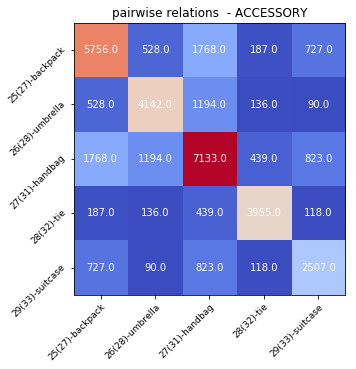

animal     [15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
   indices    :  10 [15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
   ext_indices:  10 [16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


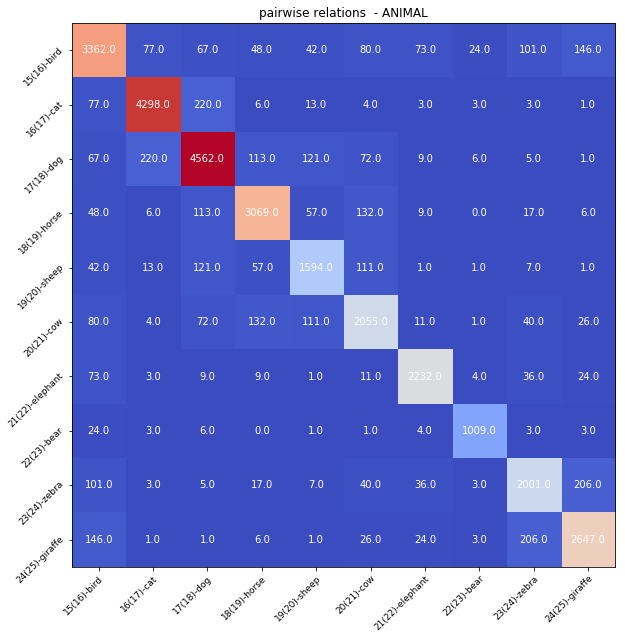

appliance     [69, 70, 71, 72, 73]
   indices    :  5 [69, 70, 71, 72, 73]
   ext_indices:  5 [78, 79, 80, 81, 82]


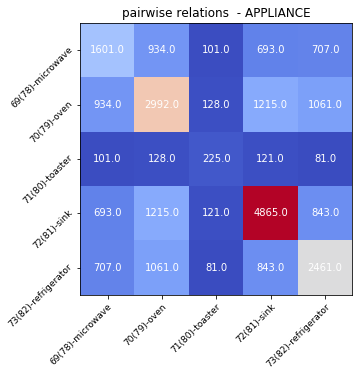

electronic     [63, 64, 65, 66, 67, 68]
   indices    :  6 [63, 64, 65, 66, 67, 68]
   ext_indices:  6 [72, 73, 74, 75, 76, 77]


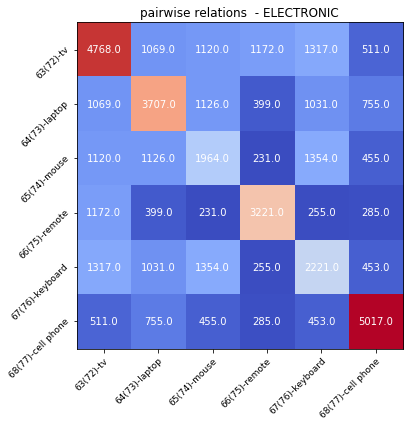

food     [47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
   indices    :  10 [47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
   ext_indices:  10 [52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


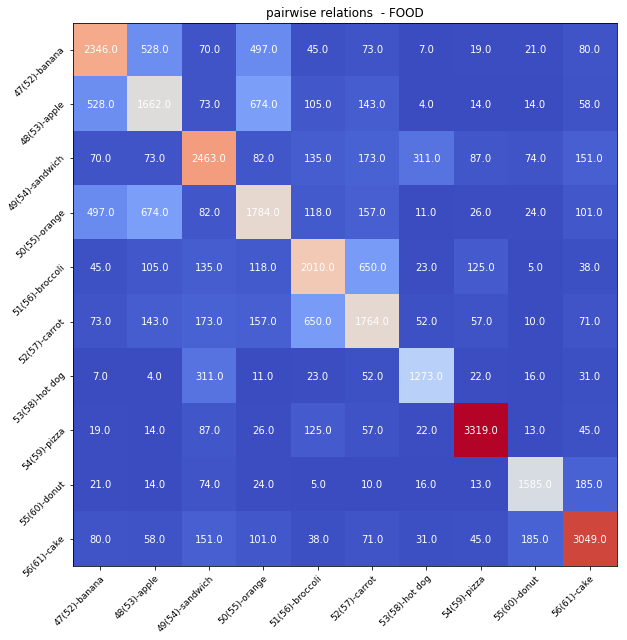

furniture     [57, 58, 59, 60, 61, 62]
   indices    :  6 [57, 58, 59, 60, 61, 62]
   ext_indices:  6 [62, 63, 64, 65, 67, 70]


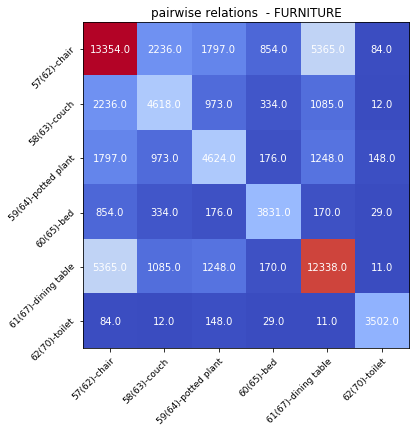

indoor     [74, 75, 76, 77, 78, 79, 80]
   indices    :  7 [74, 75, 76, 77, 78, 79, 80]
   ext_indices:  7 [84, 85, 86, 87, 88, 89, 90]


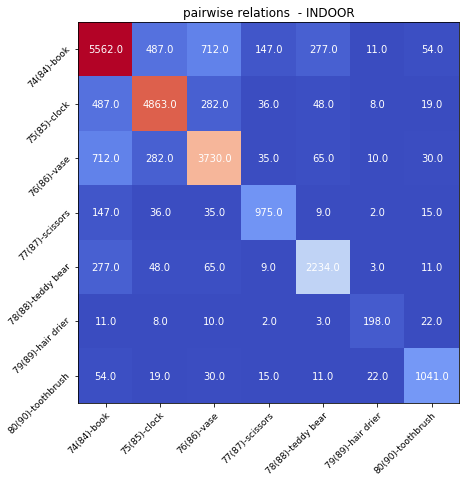

kitchen     [40, 41, 42, 43, 44, 45, 46]
   indices    :  7 [40, 41, 42, 43, 44, 45, 46]
   ext_indices:  7 [44, 46, 47, 48, 49, 50, 51]


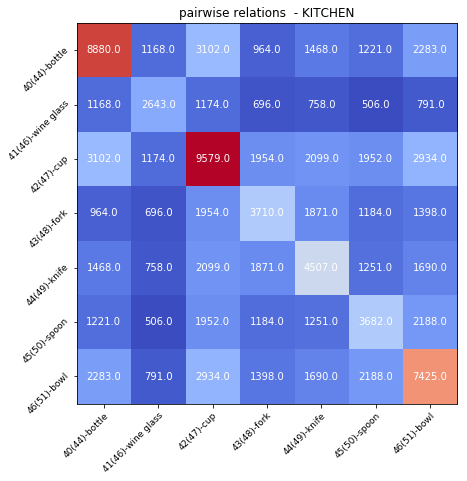

outdoor     [10, 11, 12, 13, 14]
   indices    :  5 [10, 11, 12, 13, 14]
   ext_indices:  5 [10, 11, 13, 14, 15]


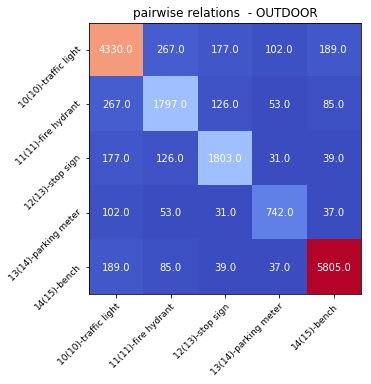

person     [1]
   indices    :  1 [1]
   ext_indices:  1 [1]


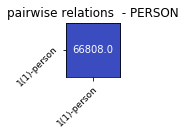

sports     [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
   indices    :  10 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
   ext_indices:  10 [34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


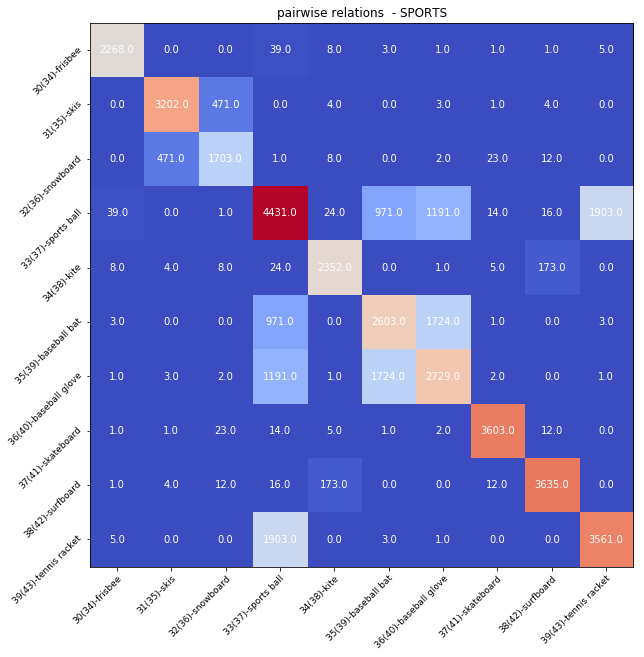

vehicle     [2, 3, 4, 5, 6, 7, 8, 9]
   indices    :  8 [2, 3, 4, 5, 6, 7, 8, 9]
   ext_indices:  8 [2, 3, 4, 5, 6, 7, 8, 9]


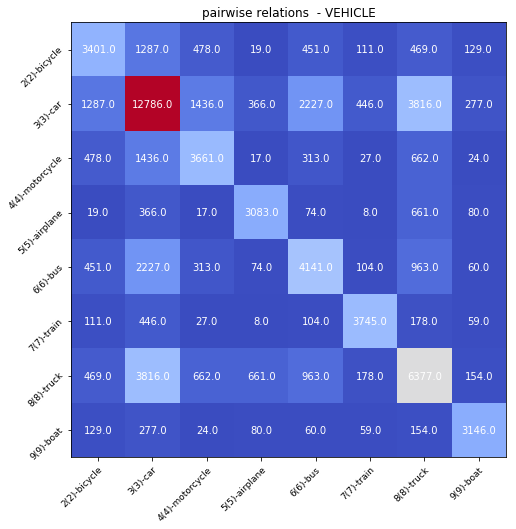

In [119]:

for category in sorted(dataset.category_to_class_map):   #category_to_class_map:
    
    if category == 'background':
         continue
    hmfig = display_pairwise_heatmap_2(dataset, category, pairwise_matrix)
#     indices     = dataset.category_to_class_map[category]
#     ext_indices = dataset.category_to_external_class_map[category]
#     show_labels = [str(idx)+'('+str(ext_idx)+')-'+dataset.class_names[idx] for idx, ext_idx in zip(indices, ext_indices)]
#     show_matrix = (pairwise_matrix[indices])[:,indices]
    
#     print('  ',category, len(indices), 'matrix shape',show_matrix.shape)
#     print('   indices    : ', indices)
#     print('   ext_indices: ', ext_indices)
#     print('   labels     : ', show_labels)
#     category_ttl = ' - '+category
#     hmfig = display_pairwise_heatmap(show_matrix, show_labels, category_ttl, cm.coolwarm)
#     hmfig.savefig("E:\\Users\\Kevin.Bardool\\Desktop\\NN Related files\\"+category_ttl)

##  Display pairwise relations for all classes

In [94]:
# indices = []
# external_indices = []
# category_ttl = ''
# show_class_ids = dataset.class_ids ## [57, 58, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
# print(show_class_ids)
# show_labels = [str(index)+'-'+dataset.class_names[index] for index in show_class_ids]
# show_matrix = (pairwise_matrix[show_class_ids])[:,show_class_ids]
# hmfig = display_pairwise_heatmap(show_matrix, show_labels, ' ACTIVE CLASSES')

# hmfig.savefig("E:\\Users\\Kevin.Bardool\\Desktop\\NN Related files\\ALL_CLASSES")

#### APPLIANCE - KITCHEN - SPORTS - OUTDOOR

appliance   [69, 70, 71, 72, 73]
kitchen   [40, 41, 42, 43, 44, 45, 46]
sports   [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
outdoor   [10, 11, 12, 13, 14]
 indices    :  27 [69, 70, 71, 72, 73, 40, 41, 42, 43, 44, 45, 46, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 10, 11, 12, 13, 14]
 ext_indices:  27 [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]


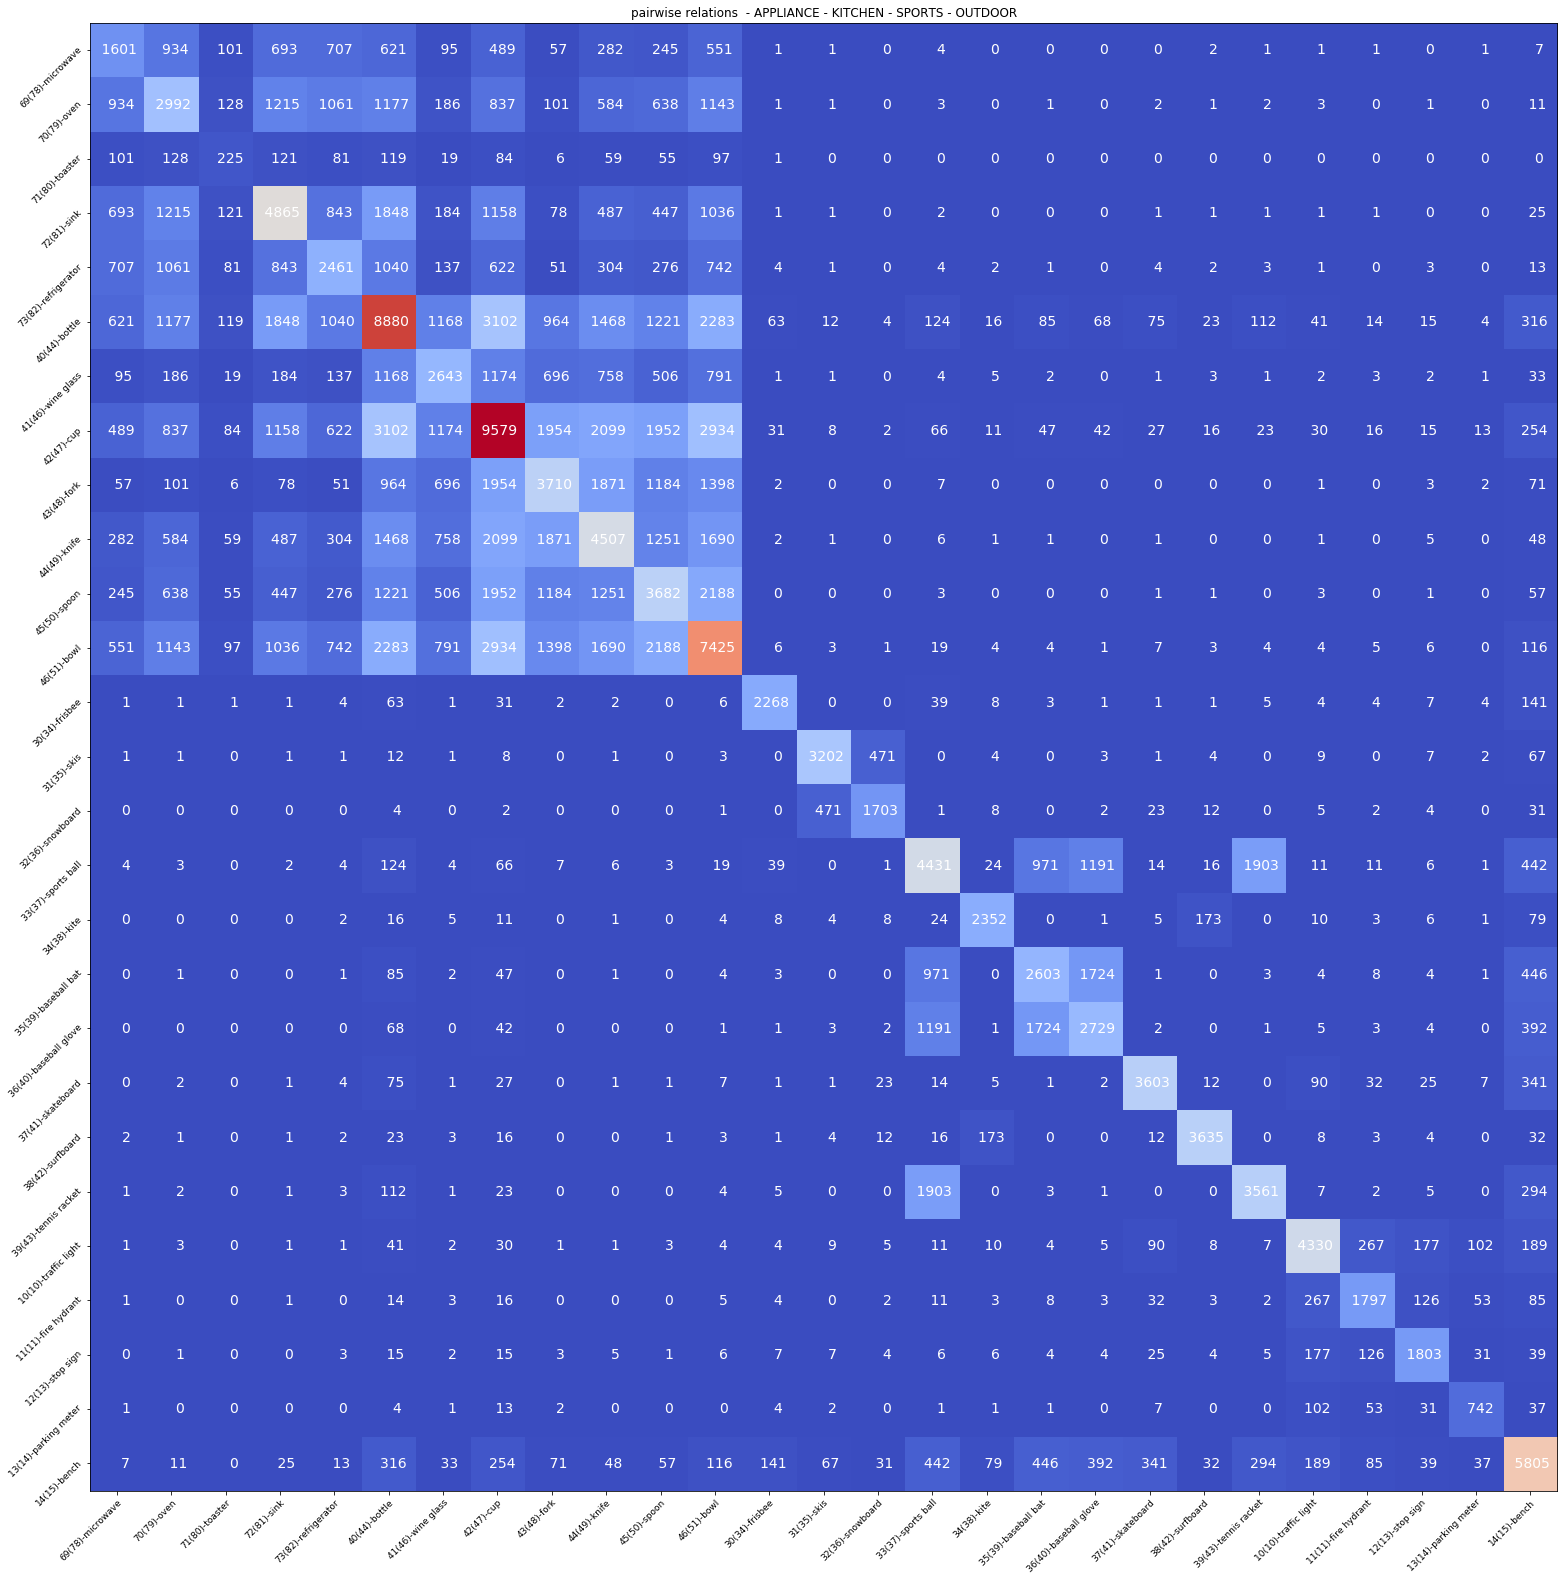

In [62]:
hmfig = display_pairwise_heatmap_2(dataset, ['appliance',  'kitchen' , 'sports', 'outdoor'], pairwise_matrix)
# hmfig.savefig("E:\\Users\\Kevin.Bardool\\Desktop\\NN Related files\\"+category_ttl)

####  FURNITURE - ELECTRONIC

furniture   [57, 58, 59, 60, 61, 62]
electronic   [63, 64, 65, 66, 67, 68]
 indices    :  12 [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
 ext_indices:  12 [62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77]


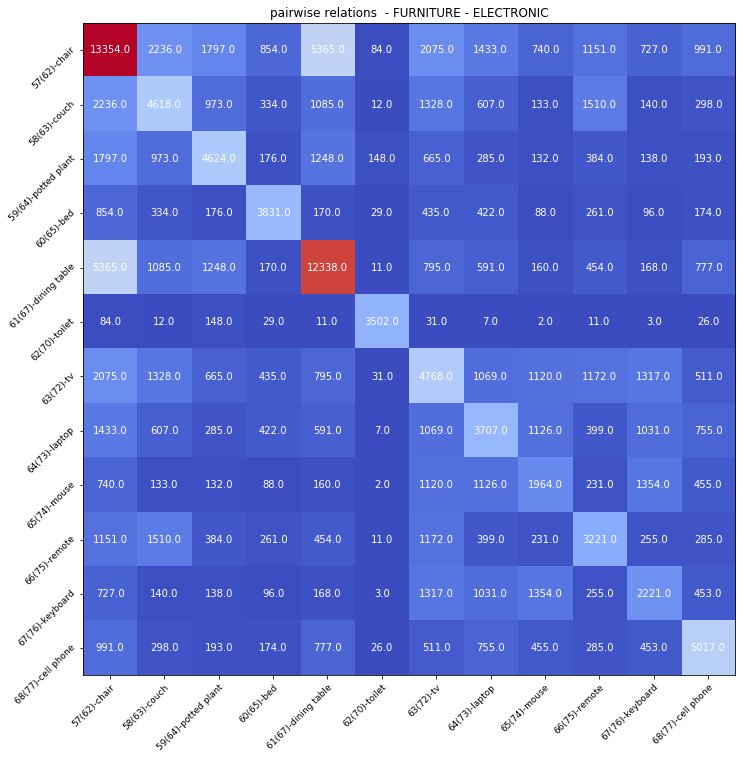

In [123]:
hmfig = display_pairwise_heatmap_2(dataset,  ['furniture',  'electronic' ], pairwise_matrix)

#### FURNITURE-FOOD

furniture     [57, 58, 59, 60, 61, 62]
food     [47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
   indices    :  16 [57, 58, 59, 60, 61, 62, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
   ext_indices:  16 [62, 63, 64, 65, 67, 70, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


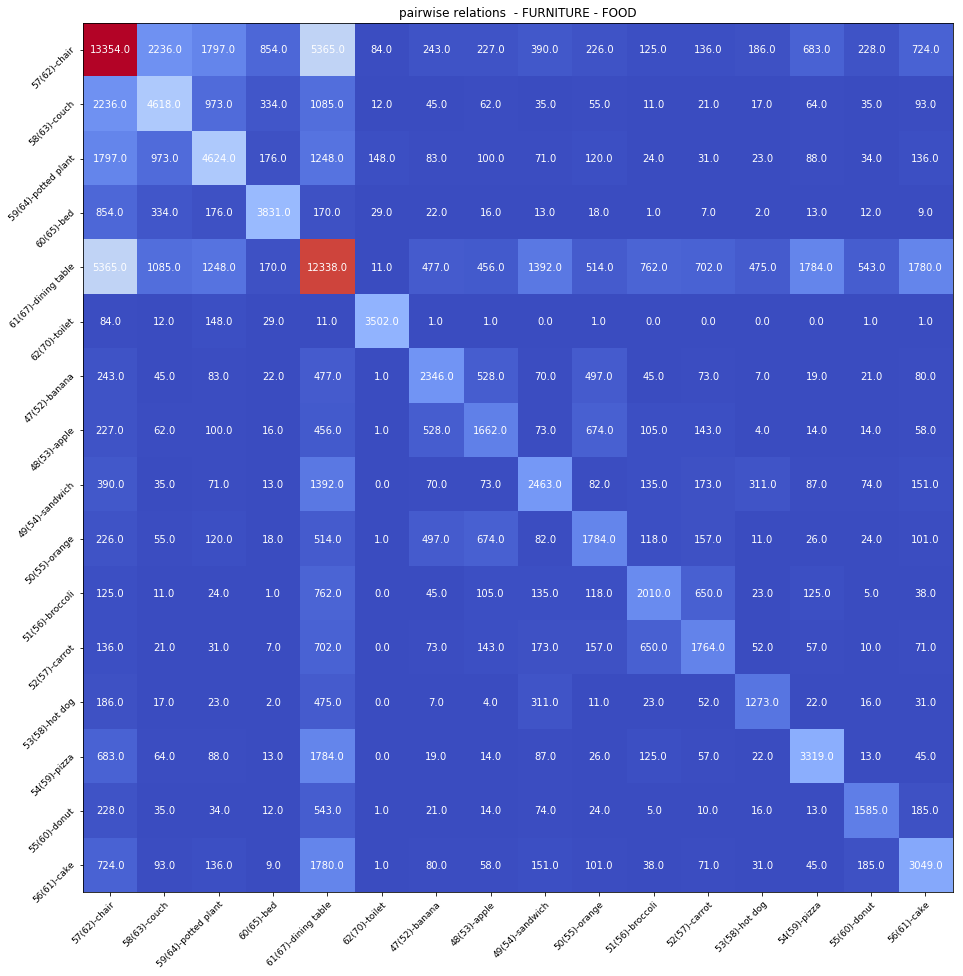

In [112]:
hmfig = display_pairwise_heatmap_2(dataset,  ['furniture',  'food' ], pairwise_matrix)

#### FURNITURE-INDOOR

furniture     [57, 58, 59, 60, 61, 62]
indoor     [74, 75, 76, 77, 78, 79, 80]
   indices    :  13 [57, 58, 59, 60, 61, 62, 74, 75, 76, 77, 78, 79, 80]
   ext_indices:  13 [62, 63, 64, 65, 67, 70, 84, 85, 86, 87, 88, 89, 90]


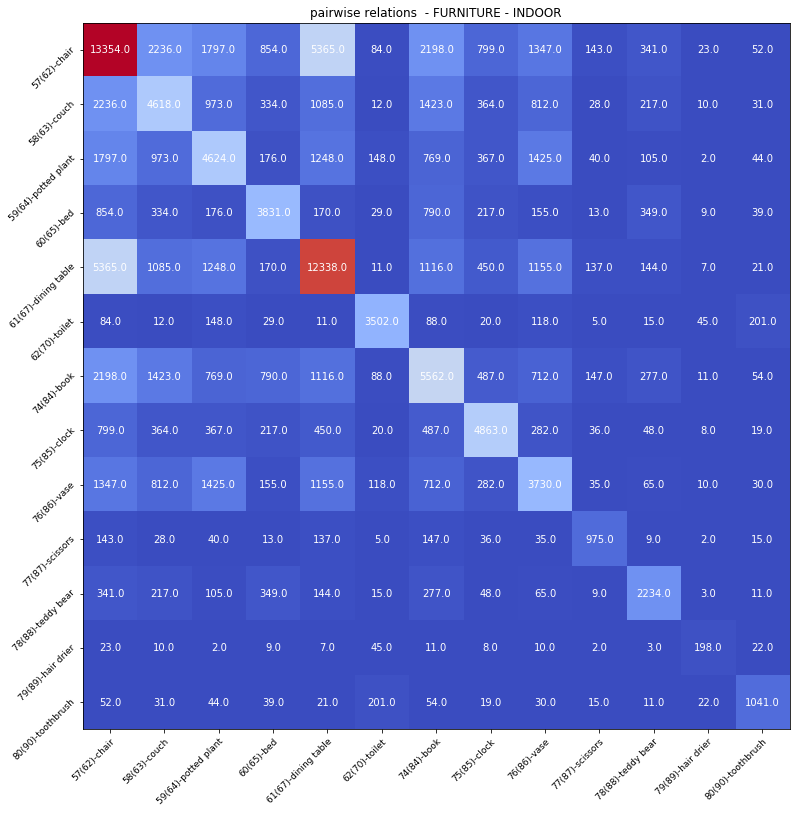

In [113]:
hmfig = display_pairwise_heatmap_2(dataset,  ['furniture',  'indoor' ], pairwise_matrix)

#### APPLIANCE - KITCHEN - SPORTS

appliance     [69, 70, 71, 72, 73]
kitchen     [40, 41, 42, 43, 44, 45, 46]
sports     [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
   indices    :  22 [69, 70, 71, 72, 73, 40, 41, 42, 43, 44, 45, 46, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
   ext_indices:  22 [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


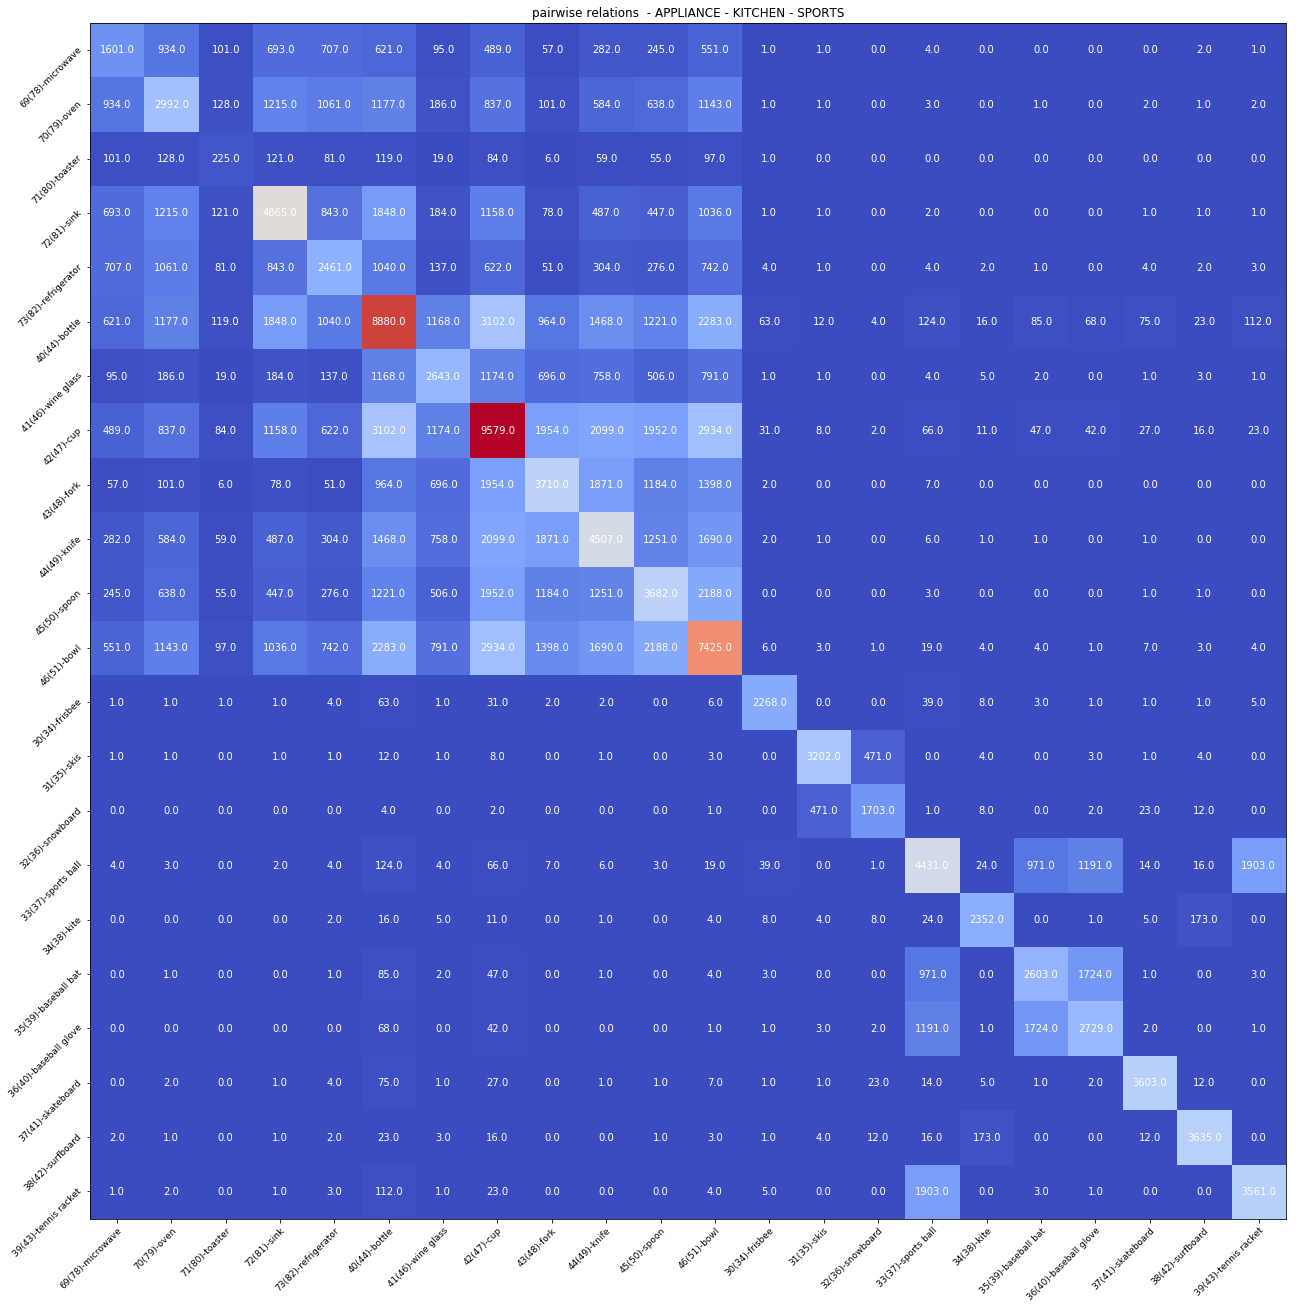

In [114]:
hmfig = display_pairwise_heatmap_2(dataset, ['appliance',  'kitchen' , 'sports'], pairwise_matrix)
# hmfig.savefig("E:\\Users\\Kevin.Bardool\\Desktop\\NN Related files\\"+category_ttl)

#### APPLIANCE - KITCHEN - OUTDOOR

appliance     [69, 70, 71, 72, 73]
kitchen     [40, 41, 42, 43, 44, 45, 46]
outdoor     [10, 11, 12, 13, 14]
   indices    :  17 [69, 70, 71, 72, 73, 40, 41, 42, 43, 44, 45, 46, 10, 11, 12, 13, 14]
   ext_indices:  17 [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 10, 11, 13, 14, 15]


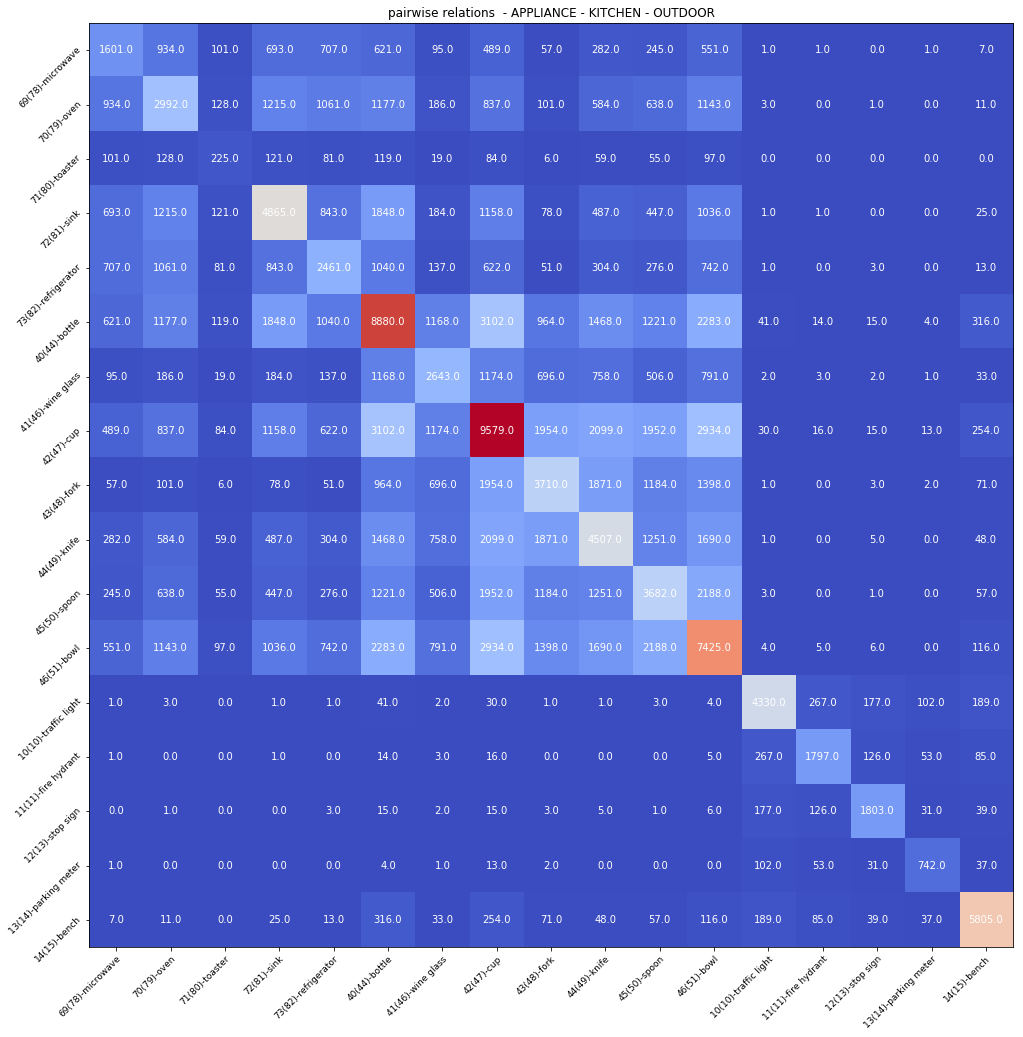

In [115]:
hmfig = display_pairwise_heatmap_2(dataset,['appliance',  'kitchen' , 'outdoor'], pairwise_matrix)
# hmfig.savefig("E:\\Users\\Kevin.Bardool\\Desktop\\NN Related files\\"+category_ttl)

####  APPLIANCE - KITCHEN - FURNITURE

appliance     [69, 70, 71, 72, 73]
kitchen     [40, 41, 42, 43, 44, 45, 46]
furniture     [57, 58, 59, 60, 61, 62]
   indices    :  18 [69, 70, 71, 72, 73, 40, 41, 42, 43, 44, 45, 46, 57, 58, 59, 60, 61, 62]
   ext_indices:  18 [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 62, 63, 64, 65, 67, 70]


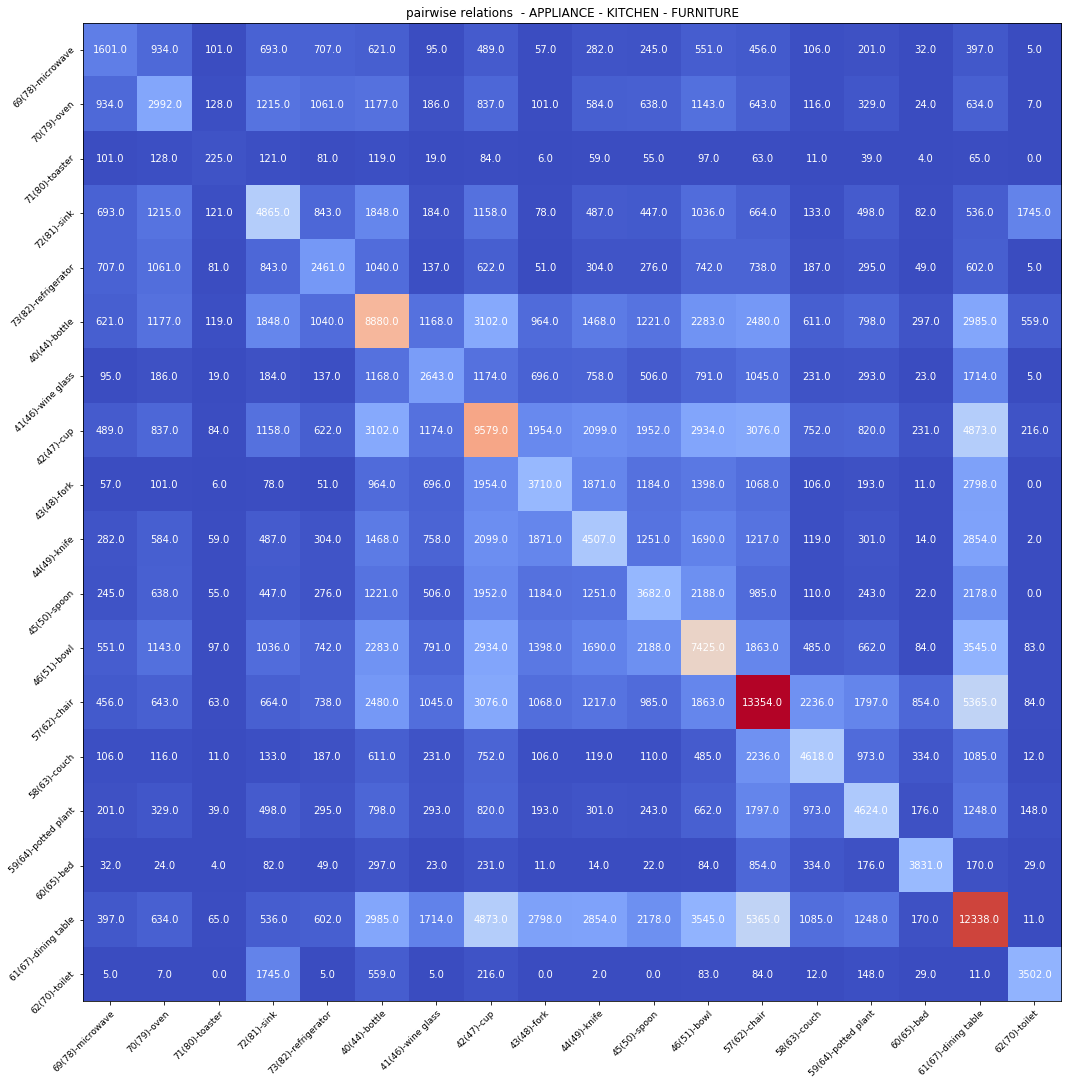

In [116]:
hmfig = display_pairwise_heatmap_2(dataset,['appliance',  'kitchen' , 'furniture'], pairwise_matrix)
# hmfig.savefig("E:\\Users\\Kevin.Bardool\\Desktop\\NN Related files\\"+category_ttl)

## HeatmapDataset

In [ ]:
HEATMAP_PATH = os.path.join(paths.DIR_DATASET,'coco2014_heatmaps')
print(HEATMAP_PATH)
from mrcnn.heatmap import HeatmapDataset
dataset = HeatmapDataset()

In [ ]:
dataset.load_heatmap(mrcnn_config.COCO_DATASET_PATH, HEATMAP_PATH, 'minival')
# def load_heatmap(self, dataset_dir, heatmap_dataset_dir, subset, class_ids=None,class_map=None, return_coco=False):
dataset.prepare()

#### simulate `load_heatmap()`

In [ ]:
dataset_dir =mrcnn_config.COCO_DATASET_PATH
heatmap_dataset_dir = HEATMAP_PATH
subset = 'minival'
class_ids=None
class_map=None
return_coco=False

In [ ]:
image_dir = os.path.join(dataset_dir, "train2014" if subset == "train" else "val2014")
heatmap_dir = os.path.join(heatmap_dataset_dir, "train2014" if subset == "train" else "val2014")
#       image_dir = os.path.join(dataset_dir, "train2017" if subset == "train" lse "val2017")
print(image_dir,'\n', heatmap_dir)
 
# Create COCO object
json_path_dict = {
    "train"  :  "annotations/instances_train2014.json",
    "val"    :  "annotations/instances_val2014.json",
    "minival":  "annotations/instances_minival2014.json",
    "val35k" :  "annotations/instances_valminusminival2014.json",
    "test"   :  "annotations/image_info_test2014.json"
}
print('subset: ', subset, 'json_path_dir: ', json_path_dict[subset])
coco = COCO(os.path.join(dataset_dir, json_path_dict[subset]))

In [ ]:
# Load all classes or a subset?
if not class_ids:
    # All classes
    class_ids = sorted(coco.getCatIds())
print(' ClassIds     :', class_ids)

In [ ]:
##--------------------------------------------------------------
## Get image ids - using COCO
##--------------------------------------------------------------
#All images or a subset?
if class_ids:
    print(' Subset of classes')
    image_ids = []
    for id in class_ids:
        image_ids.extend(list(coco.getImgIds(catIds=[id])))
    # Remove duplicates
    image_ids = list(set(image_ids))
else:
    # All images
    class_ids = sorted(coco.getCatIds())
    print(' All classes')    
    image_ids = list(coco.imgs.keys())
    
print(' ClassIds     : ', len(class_ids))
print(' Image ids    : ', len(image_ids))

In [ ]:
# # Add classes to dataset.class_info structure
for i in class_ids:
    dataset.add_class("coco", i, coco.loadCats(i)[0]["name"])

In [ ]:
len(dataset.class_info)
# image_ids[:20]

In [ ]:
# # print(' ClassIds     :', class_ids)
# # Add images to dataset.image_info structure
dataset.image_info = []
heatmap_notfound=  heatmap_found = 0
print(heatmap_notfound, heatmap_found)
for i in image_ids:
    print('image id: ',i)
    heatmap_filename = 'hm_{:012d}.npz'.format(i)
    heatmap_path = os.path.join(heatmap_dir, heatmap_filename) 
    
    ## Only load image_info data structure for images where the corrsponding 
    ## heatmap .npz file exist
    if not os.path.isfile(heatmap_path):
        print('file not found:::',heatmap_filename)
        heatmap_notfound += 1
    else:
        dataset.add_image(
            "coco", image_id=i,
            path=os.path.join(image_dir, coco.imgs[i]['file_name']),
            width=coco.imgs[i]["width"],
            height=coco.imgs[i]["height"],
            heatmap_path=heatmap_path
          )
        heatmap_found += 1
        # annotations=coco.loadAnns(coco.getAnnIds(imgIds=[i], catIds=class_ids, iscrowd=None)))
        
        
print(' Images ids :', len(image_ids))
print('    Corresponding heatmap found     :' , heatmap_found)
print('    Corresponding heatmap not found :' , heatmap_notfound)
print(' Total      :', heatmap_found + heatmap_notfound)

In [ ]:
print(len(dataset.image_ids))
print(len(dataset.image_info))
print(dataset.image_info[0])
# print(dataset.image_info[5000])

In [ ]:
##--------------------------------------------------------------
## Get image ids - using walk on HEATMAP_PATH
##--------------------------------------------------------------
print(' image dir        : ', image_dir) 
print(' json_path_dir    : ', os.path.join(dataset_dir, json_path_dict[subset]))
regex = re.compile(".*/\w+(\d{12})\.jpg")


image_ids = [] 
heatmap_files = next(os.walk(heatmap_dir))[2]
print('heat ap dir :' , heatmap_dir)

In [ ]:
for hm_file in heatmap_files:
    print(' Processing file: ', hm_file)
    heatmap_path=os.path.join(heatmap_dir, hm_file) 
    i = int(os.path.splitext(hm_file.lstrip('hm_'))[0])
    loaddata = np.load(heatmap_path)
    print(loaddata['coco_info'])
    coco_id = loaddata['coco_info'][0]
    coco_filename = loaddata['coco_info'][1]
    input_image_meta = loaddata['input_image_meta']
    loaddata.close()
    dataset.add_image(
        "coco", 
        image_id=i,
        path=os.path.join(image_dir, coco.imgs[i]['file_name']),
        width=coco.imgs[i]["width"],
        height=coco.imgs[i]["height"],
        heatmap_path=os.path.join(heatmap_dir, 'hm_{:012d}'.format(i)) 
      )    
#     print(input_filename, type(input_filename), len(input_filename))
#     coco_filename = input_filename.replace('\\' , "/")
#     print(coco_filename)
#     regex_match  = regex.match(input_filename)            
#     # Add images to dataset.image_info structure
#     if regex_match:
#         coco_id = int(regex_match.group(1))
#     print(i, input_image_meta[:8],' ', input_filename, ' coco_id : ',coco_id)

#     self.add_image(
#         "coco", 
#         image_id=i,
#         path = input_filename,
#         height=input_image_meta[1],
#         width= input_image_meta[2],
#         heatmap_path=heatmap_path
#       )
#     image_ids.append(i)
#         # annotations=coco.loadAnns(coco.getAnnIds(imgIds=[i], catIds=class_ids, iscrowd=None)))
# print(' number of images : ', len(image_ids))

#### Define data generator

In [ ]:
from mrcnn.datagen_fcn import fcn_data_generator, fcn_data_gen_simulate
##--------------------------------------------------------------------------------
## Data generators
##--------------------------------------------------------------------------------
generator = fcn_data_generator(dataset, mrcnn_config, shuffle=True,
                                 batch_size=mrcnn_config.BATCH_SIZE)
# val_generator   = data_generator(dataset_val, mrcnn_model.config, shuffle=True,
#                                  batch_size=mrcnn_config.BATCH_SIZE,
#                                  augment=False)

In [ ]:
train_batch_x, train_batch_y = next(generator)

for i in train_batch_x:
    print(type(i), i.shape, i.dtype)
for i in train_batch_y:
    print(type(i), i.shape)
print(train_batch_y)  

In [ ]:
# imgmeta_idx = mrcnn_model.keras_model.input_names.index('input_image_meta')
from mrcnn.visualize import plot_2d_heatmap_compare
import mrcnn.utils as utils
# def plot_2d_heatmap_compare( Z1, Z2, boxes, image_idx, class_ids,  size = None, 
#                                  num_bboxes = 0, class_names=None, scale = 1,
#                                  title = '2D Comparison between 2d heatmaps w/ bboxes'):
train_batch_x, train_batch_y = fcn_data_gen_simulate(dataset, mrcnn_config, [210])
img_meta    = train_batch_x[1]
class_names = dataset.class_names
print(img_meta.shape)
for img_idx in range(mrcnn_config.BATCH_SIZE):
    print(img_meta[img_idx])
    image_id = img_meta[img_idx,0]
    image = dataset.load_image(image_id)
    timg  = train_batch_x[0][img_idx]
    print(' image from train_batch_x :', timg.shape, timg.dtype, np.min(timg), np.max(timg))
    print(' image from dataset load  :', image.shape, image.dtype, np.min(image), np.max(image))
    ## Display image, and mean-subtracted image
    visualize.display_image_bw(image)
#     visualize.display_images([image, train_batch_x[0][img_idx]], cols = 2, width = 18)
    
    ## display masks and bounding boxes
    mask, class_ids = dataset.load_mask(image_id)
    print('class_ids:', class_ids)
    bbox = utils.extract_bboxes(mask)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)
    visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset.class_names, figsize =(8,8)) 
    

    ## display ground truth heatmaps
    gt_class_ids = np.unique(train_batch_x[5][img_idx,:,:,4]).astype(int).tolist()
    print('Image : {}  GT ClassIds: {}'.format(img_idx, gt_class_ids))
#     visualize.plot_2d_heatmap_no_bboxes(train_batch_x[4],img_idx, columns = 4, class_names=class_names)    
    visualize.plot_2d_heatmap_no_bboxes(train_batch_x[4], img_idx,class_ids = gt_class_ids, columns = 4, class_names=class_names)
    
    
    ## display predicted heatmaps
    pr_class_ids = np.unique(train_batch_x[3][img_idx,:,:,4]).astype(int).tolist()
    print('Image : {}  PR ClassIds: {}'.format(img_idx, pr_class_ids))
#     visualize.plot_2d_heatmap_no_bboxes(train_batch_x[2],img_idx, columns = 4, class_names=class_names)
    visualize.plot_2d_heatmap_no_bboxes(train_batch_x[2], img_idx,class_ids = gt_class_ids, columns = 4, class_names=class_names)
        

In [ ]:
from mrcnn.utils import unresize_image
from   matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import skimage.util
import skimage.io
paths.display()


In [ ]:
# ds = os.path.join(paths.COCO_DATASET_PATH,'val2014/COCO_val2014_000000017031.jpg')
ds = dataset.image_info[210]['path']
print(ds)
im = skimage.io.imread(ds)
print(im.shape, im.dtype, np.min(im), np.max(im))
# im = skimage.io.imread(ds)
# im = Image.open(ds)

In [ ]:
print('image    : ', image.shape, image.dtype)
image_bw = Image.fromarray(image).convert(mode='L')
# print('image_bw : ', image_bw.shape, image_bw.dtype)

molded_image, window, scale, padding = utils.resize_image(
    image,
    min_dim=mrcnn_config.IMAGE_MIN_DIM,
    max_dim=mrcnn_config.IMAGE_MAX_DIM,
    padding=mrcnn_config.IMAGE_PADDING)
print('molded_image   : ', molded_image.shape, molded_image.dtype)
print(' image meta    :', train_batch_x[1][0])

unresized_image = unresize_image(molded_image,train_batch_x[1][0])
print('unresized_image : ', unresized_image.shape, unmolded_image.dtype)

unresized_image_bw = np.asarray(Image.fromarray(unresized_image).convert(mode='L'))
print('unresized_image_bw: ',unresized_image_bw.shape, unresized_image_bw.dtype)


unmolded_image = utils.unmold_image(molded_image, mrcnn_config)
print('unmolded_image : ', unmolded_image.shape, unmolded_image.dtype)

unmolded_image_bw = np.asarray(Image.fromarray(unmolded_image).convert(mode='L'))
print('unmolded_image_bw : ', unmolded_image_bw.shape, unmolded_image_bw.dtype)


unmolded_heatmap = unresize_image(train_batch_x[2][0,:,:,24],train_batch_x[1][0], upscale = mrcnn_config.HEATMAP_SCALE_FACTOR)
print('unmolded_heatmap : ', unmolded_heatmap.shape, unmolded_heatmap.dtype)


print(train_batch_x[2][0,:,:,24].dtype)




In [ ]:
import matplotlib.pyplot as plt
print('Orig image shape: ', image.shape)
print('Image window is : ', window)
print('Scale is        : ', scale)
print(train_batch_x[1][0,:8])
print('Padding is :', padding)
fig = plt.figure(frameon=False, figsize=(10,10))
im1 = plt.imshow(molded_image)



fig = plt.figure(frameon=False, figsize=(10,10))
im1 = plt.imshow(unresized_image)
fig = plt.figure(frameon=False, figsize=(10,10))
im1 = plt.imshow(unresized_image_bw, cmap=plt.cm.gray)

fig = plt.figure(frameon=False, figsize=(10,10))
im1 = plt.imshow(unmolded_image)
fig = plt.figure(frameon=False, figsize=(10,10))
im1 = plt.imshow(unmolded_image_bw, cmap=plt.cm.gray)
# fig = plt.figure(frameon=False, figsize=(10,10))
# im1 = plt.imshow(unmolded_image_bw)

# fig = plt.figure(frameon=False, figsize=(10,10))
# im1 = plt.imshow(unmolded_heatmap,cmap = cm.YlOrRd)


# fig = plt.figure(frameon=False, figsize=(10,10))
# im1 = plt.imshow(unmolded_image , cmap=plt.cm.gray)
# im1 = plt.imshow(unmolded_heatmap, alpha = 0.6,cmap=cm.YlOrRd)  


# fig = plt.figure(frameon=False, figsize=(10,10))
# im1 = plt.imshow(image_bw , cmap=plt.cm.gray)
# im1 = plt.imshow(unmolded_heatmap, alpha = 0.6,cmap=cm.YlOrRd)  
plt.show()

In [ ]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn
# visualize.display_image_bw(image)
display_heatmaps(train_batch_x, 0, hm = 'pr', config = mrcnn_config, class_ids = [0,1,2,3,4,5,24], class_names = dataset.class_names)
# display_heatmaps(train_batch_x, 0, hm = 'gt', config = mrcnn_config, class_ids = [0,1,2,3,4,5,24], class_names = dataset.class_names)